In [3]:
import pandas as pd

# Specifica il percorso del file CSV
file_path = "restaurants.csv"

# Leggi il file CSV utilizzando il punto e virgola come separatore
df = pd.read_csv(file_path, sep=';')

# Cambia il formato delle date
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d')

# Utilizza il metodo pivot per creare 6 colonne separate per i ristoranti
df_pivot = df.pivot(index='data', columns='ristorante', values=['scontrini', 'lordototale'])

# Resetta l'indice
df_pivot.reset_index(inplace=True)

# Rinomina le colonne in modo permanente
df_pivot.columns = ['data'] + [f'R{col[0]}_{col[1]}' for col in df_pivot.columns[1:]]
df_pivot.rename(columns={col: col.lstrip('R') for col in df_pivot.columns[1:]}, inplace=True)
df_pivot.rename(columns={col: col.replace('scontrini', 's').replace('lordototale', 'lt') for col in df_pivot.columns[1:]}, inplace=True)

# Visualizza il DataFrame con le colonne rinominate
df_pivot

,data,s_R000,s_R001,s_R002,s_R003,s_R004,s_R005,lt_R000,lt_R001,lt_R002,lt_R003,lt_R004,lt_R005
0,2018-01-01,21884.0,28101.0,NaN,19961.0,23173.0,19541.0,765441.81,1197357.21,NaN,385808.08,789949.23,624257.76
1,2018-01-02,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
2,2018-01-03,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
3,2018-01-04,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
4,2018-01-05,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2023-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1973,2023-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1974,2023-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1975,2023-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00


In [4]:
df_pivot.dtypes

data       datetime64[ns]
s_R000            float64
s_R001            float64
s_R002            float64
s_R003            float64
s_R004            float64
s_R005            float64
lt_R000           float64
lt_R001           float64
lt_R002           float64
lt_R003           float64
lt_R004           float64
lt_R005           float64
dtype: object

In [5]:
df_pivot = df_pivot.rename(columns={'s_R000': 'S_R1', 's_R001': 'S_R2', 's_R002': 'S_R3', 's_R003': 'S_R4', 's_R004': 'S_R5', 's_R005': 'S_R6', 'lt_R000': 'LT_R1', 'lt_R001': 'LT_R2', 'lt_R002': 'LT_R3', 'lt_R003': 'LT_R4', 'lt_R004': 'LT_R5', 'lt_R005': 'LT_R6'})
df_pivot

,data,S_R1,S_R2,S_R3,S_R4,S_R5,S_R6,LT_R1,LT_R2,LT_R3,LT_R4,LT_R5,LT_R6
0,2018-01-01,21884.0,28101.0,NaN,19961.0,23173.0,19541.0,765441.81,1197357.21,NaN,385808.08,789949.23,624257.76
1,2018-01-02,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
2,2018-01-03,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
3,2018-01-04,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
4,2018-01-05,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2023-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1973,2023-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1974,2023-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1975,2023-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00


Converto i valori NaN in 0

In [6]:
df_pivot.fillna(0, inplace=True)
df_pivot['Anno'] = df_pivot['data'].dt.year
df_pivot['Mese'] = df_pivot['data'].dt.month
# Aggiungi una colonna per il giorno della settimana
df_pivot['day_of_week'] = pd.to_datetime(df_pivot['data']).dt.dayofweek

# Mappa il numero del giorno della settimana a una stringa rappresentante il giorno
giorni_settimana = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}


df_pivot['day_of_week'] = df_pivot['day_of_week'].map(giorni_settimana)
df_pivot

,data,S_R1,S_R2,S_R3,S_R4,S_R5,S_R6,LT_R1,LT_R2,LT_R3,LT_R4,LT_R5,LT_R6,Anno,Mese,day_of_week
0,2018-01-01,21884.0,28101.0,0.0,19961.0,23173.0,19541.0,765441.81,1197357.21,0.0,385808.08,789949.23,624257.76,2018,1,Monday
1,2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2018,1,Tuesday
2,2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2018,1,Wednesday
3,2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2018,1,Thursday
4,2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2018,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2023-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2023,5,Saturday
1973,2023-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2023,5,Sunday
1974,2023-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2023,5,Monday
1975,2023-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,2023,5,Tuesday


creo un dataset per ogni ristorante, ottengo quindi 6 dataset distinti

In [7]:
# Seleziona solo le colonne desiderate
df_R1 = df_pivot[['data', 'S_R1', 'LT_R1', 'Anno', 'Mese', 'day_of_week']]
df_R2 = df_pivot[['data', 'S_R2', 'LT_R2', 'Anno', 'Mese', 'day_of_week']]
df_R3 = df_pivot[['data', 'S_R3', 'LT_R3', 'Anno', 'Mese', 'day_of_week']]
df_R4 = df_pivot[['data', 'S_R4', 'LT_R4', 'Anno', 'Mese', 'day_of_week']]
df_R5 = df_pivot[['data', 'S_R5', 'LT_R5', 'Anno', 'Mese', 'day_of_week']]
df_R6 = df_pivot[['data', 'S_R6', 'LT_R6', 'Anno', 'Mese', 'day_of_week']]
# Stampare il nuovo DataFrame
print(df_R1)

           data     S_R1      LT_R1  Anno  Mese day_of_week
0    2018-01-01  21884.0  765441.81  2018     1      Monday
1    2018-01-02      0.0       0.00  2018     1     Tuesday
2    2018-01-03      0.0       0.00  2018     1   Wednesday
3    2018-01-04      0.0       0.00  2018     1    Thursday
4    2018-01-05      0.0       0.00  2018     1      Friday
...         ...      ...        ...   ...   ...         ...
1972 2023-05-27      0.0       0.00  2023     5    Saturday
1973 2023-05-28      0.0       0.00  2023     5      Sunday
1974 2023-05-29      0.0       0.00  2023     5      Monday
1975 2023-05-30      0.0       0.00  2023     5     Tuesday
1976 2023-05-31      0.0       0.00  2023     5   Wednesday

[1977 rows x 6 columns]


**GESTIONE VALORI ANOMALI**

plottiamo scatterplot/boxplot per ogni ristorante per vedere l'andamento dei dati durante gli anni

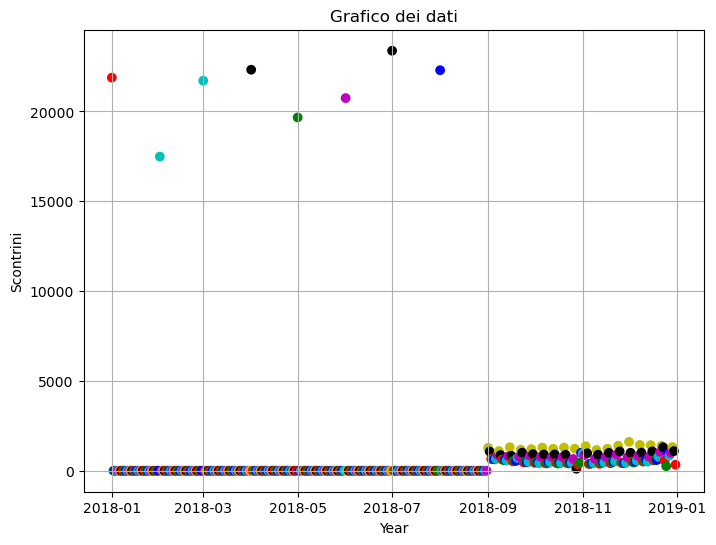

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df_R1)

start_date = '2018-01-01'
end_date = '2018-12-31'

# Filtra il DataFrame in base alle date
filtered_df = df[(df['data'] >= start_date) & (df['data'] <= end_date)]

# Estrai i valori delle colonne da plottare
x = filtered_df['data']
y = filtered_df['S_R1']

colors = {
    'Monday': 'r', #red
    'Tuesday': 'g', #green
    'Wednesday': 'b', #blue
    'Thursday': 'c', #cyan
    'Friday': 'm', #magenta
    'Saturday': 'y', #yellow
    'Sunday': 'k' #black
}

# Ottieni i colori corrispondenti alle classi
point_colors = [colors[day] for day in filtered_df['day_of_week']]

# Crea il grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=point_colors, marker='o')
plt.title('Grafico dei dati')
plt.xlabel('Year')
plt.ylabel('Scontrini')
plt.grid(True)
plt.show()

In [9]:
df_R1 = df_R1[df_R1['S_R1'] < 5000]
df_R1 = df_R1[df_R1['LT_R1'] < 200000]
df_R2 = df_R2[df_R2['S_R2'] < 5000]
df_R2 = df_R2[df_R2['LT_R2'] < 200000]
df_R4 = df_R4[df_R4['S_R4'] < 5000]
df_R4 = df_R4[df_R4['LT_R4'] < 200000]
df_R5 = df_R5[df_R5['S_R5'] < 5000]
df_R5 = df_R5[df_R5['LT_R5'] < 200000]
df_R6 = df_R6[df_R6['S_R6'] < 5000]
df_R6 = df_R6[df_R6['LT_R6'] < 200000]

**GESTIONE DEI MISSING VALUES**

We count the number of 0 values of each restaurant for scontrini and lordototale columns

In [10]:
count_zeros_R1 = (df_R1 == 0).sum()
count_zeros_R2 = (df_R2 == 0).sum()
count_zeros_R3 = (df_R3 == 0).sum()
count_zeros_R4 = (df_R4 == 0).sum()
count_zeros_R5 = (df_R5 == 0).sum()
count_zeros_R6 = (df_R6 == 0).sum()
# Ora "count_zeros" conterrà il conteggio di zeri per ogni colonna
count_zeros_R1

data             0
S_R1           326
LT_R1          325
Anno             0
Mese             0
day_of_week      0
dtype: int64

seleziono all'interno dei 6 dataset creati solo le righe in cui o il valore degli scontrini è 0 o il valore del lordo totale è 0
nb: maschera è una booleana che mi dice true o false su tutte le righe, df[maschera] mi seleziona solo le righe true

In [11]:
maschera_R1 = (df_R1['S_R1'] == 0) | (df_R1['LT_R1'] == 0)
maschera_R2 = (df_R2['S_R2'] == 0) | (df_R2['LT_R2'] == 0)
maschera_R3 = (df_R3['S_R3'] == 0) | (df_R3['LT_R3'] == 0)
maschera_R4 = (df_R4['S_R4'] == 0) | (df_R4['LT_R4'] == 0)
maschera_R5 = (df_R5['S_R5'] == 0) | (df_R5['LT_R5'] == 0)
maschera_R6 = (df_R6['S_R6'] == 0) | (df_R6['LT_R6'] == 0)

# Filtra il DataFrame utilizzando la maschera
df_R1[maschera_R1]

,data,S_R1,LT_R1,Anno,Mese,day_of_week
1,2018-01-02,0.0,0.0,2018,1,Tuesday
2,2018-01-03,0.0,0.0,2018,1,Wednesday
3,2018-01-04,0.0,0.0,2018,1,Thursday
4,2018-01-05,0.0,0.0,2018,1,Friday
5,2018-01-06,0.0,0.0,2018,1,Saturday
...,...,...,...,...,...,...
1972,2023-05-27,0.0,0.0,2023,5,Saturday
1973,2023-05-28,0.0,0.0,2023,5,Sunday
1974,2023-05-29,0.0,0.0,2023,5,Monday
1975,2023-05-30,0.0,0.0,2023,5,Tuesday


faccio una group by per anno e mese e conto il numero di giorni per ogni mese in cui è true (quindi uguale a 0) il valore di scontrini o di lordototale
poi seleziono solo gli anni e i mesi in cui ho una somma > 0, cioè quando effettivamente ho dei valori 0, infatti quando la somma è pari a 0 vuol dire che per quel mese in quell'anno non ho valori nulli

In [12]:
conteggio_R1 = maschera_R1.groupby([df_R1['Anno'], df_R1['Mese']]).sum()
conteggio_R1 = conteggio_R1.reset_index()
conteggio_R2 = maschera_R2.groupby([df_R2['Anno'], df_R2['Mese']]).sum()
conteggio_R2 = conteggio_R2.reset_index()
conteggio_R3 = maschera_R3.groupby([df_R3['Anno'], df_R3['Mese']]).sum()
conteggio_R3 = conteggio_R3.reset_index()
conteggio_R4 = maschera_R4.groupby([df_R4['Anno'], df_R4['Mese']]).sum()
conteggio_R4 = conteggio_R4.reset_index()
conteggio_R5 = maschera_R5.groupby([df_R5['Anno'], df_R5['Mese']]).sum()
conteggio_R5 = conteggio_R5.reset_index()
conteggio_R6 = maschera_R6.groupby([df_R6['Anno'], df_R6['Mese']]).sum()
conteggio_R6 = conteggio_R6.reset_index()

print(conteggio_R1[conteggio_R1[0]>0])

    Anno  Mese   0
0   2018     1  30
1   2018     2  27
2   2018     3  30
3   2018     4  29
4   2018     5  30
5   2018     6  29
6   2018     7  30
7   2018     8  30
26  2020     3  20
27  2020     4  30
28  2020     5   6
35  2020    12   2
36  2021     1   2
39  2021     4   2
43  2021     8   1
64  2023     5  28


per i mesi in cui ho la maggioranza dei giorni con valori pari a 0 rimuovo le righe che hanno il valore sia degli scontrini che del lordo totale pari a 0. questo vuol dire che avrò ancora dei valori nulli, ma sono pochi all'interno del mese, quindi li riempiremo utilizzando l'algoritmo random forest

In [13]:
remove_R1 = (df_R1['Anno'] == 2018) & (df_R1['Mese'] == 1) & (df_R1['S_R1'] == 0) & (df_R1['LT_R1'] == 0)
df_R1_new = df_R1[~remove_R1]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8]
for mese in mesi_da_rimuovere:
    remove_R1 = (df_R1_new['Anno'] == 2018) & (df_R1_new['Mese'] == mese) & (df_R1_new['S_R1'] == 0) & (df_R1_new['LT_R1'] == 0)
    df_R1_new = df_R1_new[~remove_R1]
mesi_da_rimuovere = [3, 4]
for mese in mesi_da_rimuovere:
    remove_R1 = (df_R1_new['Anno'] == 2020) & (df_R1_new['Mese'] == mese) & (df_R1_new['S_R1'] == 0) & (df_R1_new['LT_R1'] == 0)
    df_R1_new = df_R1_new[~remove_R1]
remove_R1 = (df_R1_new['Anno'] == 2023) & (df_R1_new['Mese'] == 5) & (df_R1_new['S_R1'] == 0) & (df_R1_new['LT_R1'] == 0)
df_R1_new = df_R1_new[~remove_R1]
# Rimuovi le righe che soddisfano la condizione

df_R1_new

,data,S_R1,LT_R1,Anno,Mese,day_of_week
243,2018-09-01,1276.0,50173.7180,2018,9,Saturday
244,2018-09-02,1070.0,43169.7749,2018,9,Sunday
245,2018-09-03,657.0,24781.9411,2018,9,Monday
246,2018-09-04,647.0,25100.7771,2018,9,Tuesday
247,2018-09-05,635.0,23516.6743,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1021.0,53106.1006,2023,4,Saturday
1945,2023-04-30,930.0,51591.7948,2023,4,Sunday
1946,2023-05-01,797.0,43892.8140,2023,5,Monday
1947,2023-05-02,509.0,24259.6613,2023,5,Tuesday


faccio le stesse cose con i ristoranti 2, 3, 4, 5, 6

In [14]:
print(conteggio_R2[conteggio_R2[0]>0])

    Anno  Mese   0
0   2018     1  30
1   2018     2  27
2   2018     3  30
3   2018     4  29
4   2018     5  30
5   2018     6  29
6   2018     7  30
7   2018     8  30
26  2020     3  20
27  2020     4  30
28  2020     5   3
35  2020    12   1
39  2021     4   1
44  2021     9   4
45  2021    10  25
47  2021    12   1
51  2022     4   1
54  2022     7   4
55  2022     8   2
64  2023     5  29


In [15]:
remove_R2 = (df_R2['Anno'] == 2018) & (df_R2['Mese'] == 1) & (df_R2['S_R2'] == 0) & (df_R2['LT_R2'] == 0)
df_R2_new = df_R2[~remove_R2]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8]
for mese in mesi_da_rimuovere:
    remove_R2 = (df_R2_new['Anno'] == 2018) & (df_R2_new['Mese'] == mese) & (df_R2_new['S_R2'] == 0) & (df_R2_new['LT_R2'] == 0)
    df_R2_new = df_R2_new[~remove_R2]
mesi_da_rimuovere = [3, 4]
for mese in mesi_da_rimuovere:
    remove_R2 = (df_R2_new['Anno'] == 2020) & (df_R2_new['Mese'] == mese) & (df_R2_new['S_R2'] == 0) & (df_R2_new['LT_R2'] == 0)
    df_R2_new = df_R2_new[~remove_R2]
remove_R2 = (df_R2_new['Anno'] == 2021) & (df_R2_new['Mese'] == 10) & (df_R2_new['S_R2'] == 0) & (df_R2_new['LT_R2'] == 0)
df_R2_new = df_R2_new[~remove_R2]
remove_R2 = (df_R2_new['Anno'] == 2023) & (df_R2_new['Mese'] == 5) & (df_R2_new['S_R2'] == 0) & (df_R2_new['LT_R2'] == 0)
df_R2_new = df_R2_new[~remove_R2]

df_R2_new

,data,S_R2,LT_R2,Anno,Mese,day_of_week
243,2018-09-01,1238.0,58917.8366,2018,9,Saturday
244,2018-09-02,971.0,48995.3464,2018,9,Sunday
245,2018-09-03,782.0,36185.5732,2018,9,Monday
246,2018-09-04,793.0,36402.4808,2018,9,Tuesday
247,2018-09-05,758.0,33679.4066,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1220.0,74606.3437,2023,4,Saturday
1945,2023-04-30,1016.0,68179.6507,2023,4,Sunday
1946,2023-05-01,0.0,67024.9027,2023,5,Monday
1947,2023-05-02,806.0,43551.6347,2023,5,Tuesday


In [16]:
print(conteggio_R3[conteggio_R3[0]>0])

    Anno  Mese   0
0   2018     1  31
1   2018     2  28
2   2018     3  31
3   2018     4  30
4   2018     5  31
5   2018     6  30
6   2018     7  31
7   2018     8  31
8   2018     9  30
9   2018    10  31
10  2018    11  30
11  2018    12  31
12  2019     1  31
13  2019     2  28
14  2019     3  31
15  2019     4  30
16  2019     5  31
17  2019     6  30
18  2019     7  31
19  2019     8  31
20  2019     9  30
21  2019    10  31
22  2019    11   7
26  2020     3  20
27  2020     4  30
28  2020     5   6
35  2020    12   2
36  2021     1   1
39  2021     4   2
51  2022     4   1
54  2022     7   4
55  2022     8   3
64  2023     5  29


In [17]:
remove_R3 = (df_R3['Anno'] == 2018) & (df_R3['Mese'] == 1) & (df_R3['S_R3'] == 0) & (df_R3['LT_R3'] == 0)
df_R3_new = df_R3[~remove_R3]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for mese in mesi_da_rimuovere:
    remove_R3 = (df_R3_new['Anno'] == 2018) & (df_R3_new['Mese'] == mese) & (df_R3_new['S_R3'] == 0) & (df_R3_new['LT_R3'] == 0)
    df_R3_new = df_R3_new[~remove_R3]
mesi_da_rimuovere = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for mese in mesi_da_rimuovere:
    remove_R3 = (df_R3_new['Anno'] == 2019) & (df_R3_new['Mese'] == mese) & (df_R3_new['S_R3'] == 0) & (df_R3_new['LT_R3'] == 0)
    df_R3_new = df_R3_new[~remove_R3]
mesi_da_rimuovere = [3, 4]
for mese in mesi_da_rimuovere:
    remove_R3 = (df_R3_new['Anno'] == 2020) & (df_R3_new['Mese'] == mese) & (df_R3_new['S_R3'] == 0) & (df_R3_new['LT_R3'] == 0)
    df_R3_new = df_R3_new[~remove_R3]
remove_R3 = (df_R3_new['Anno'] == 2023) & (df_R3_new['Mese'] == 5) & (df_R3_new['S_R3'] == 0) & (df_R3_new['LT_R3'] == 0)
df_R3_new = df_R3_new[~remove_R3]

df_R3_new

,data,S_R3,LT_R3,Anno,Mese,day_of_week
669,2019-11-01,0.0,0.0000,2019,11,Friday
670,2019-11-02,0.0,0.0000,2019,11,Saturday
671,2019-11-03,0.0,0.0000,2019,11,Sunday
672,2019-11-04,0.0,0.0000,2019,11,Monday
673,2019-11-05,0.0,0.0000,2019,11,Tuesday
...,...,...,...,...,...,...
1943,2023-04-28,1132.0,61851.0039,2023,4,Friday
1944,2023-04-29,1230.0,72773.2845,2023,4,Saturday
1945,2023-04-30,1111.0,64834.1442,2023,4,Sunday
1946,2023-05-01,901.0,55226.0709,2023,5,Monday


NB ho rimosso più righe!!!!

In [18]:
print(conteggio_R4[conteggio_R4[0]>0])

    Anno  Mese   0
0   2018     1  30
1   2018     2  27
2   2018     3  30
3   2018     4  29
4   2018     5  30
5   2018     6  29
6   2018     7  30
7   2018     8  30
11  2018    12   2
12  2019     1   1
15  2019     4   2
19  2019     8   1
23  2019    12   2
24  2020     1   1
26  2020     3  20
27  2020     4  30
28  2020     5  31
29  2020     6   2
31  2020     8   2
34  2020    11   1
35  2020    12   2
39  2021     4   2
43  2021     8   1
47  2021    12   2
48  2022     1   1
51  2022     4   2
55  2022     8   1
59  2022    12   2
60  2023     1   1
63  2023     4   2
64  2023     5  28


In [19]:
remove_R4 = (df_R4['Anno'] == 2018) & (df_R4['Mese'] == 1) & (df_R4['S_R4'] == 0) & (df_R4['LT_R4'] == 0)
df_R4_new = df_R4[~remove_R4]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8]
for mese in mesi_da_rimuovere:
    remove_R4 = (df_R4_new['Anno'] == 2018) & (df_R4_new['Mese'] == mese) & (df_R4_new['S_R4'] == 0) & (df_R4_new['LT_R4'] == 0)
    df_R4_new = df_R4_new[~remove_R4]
mesi_da_rimuovere = [3, 4, 5]
for mese in mesi_da_rimuovere:
    remove_R4 = (df_R4_new['Anno'] == 2020) & (df_R4_new['Mese'] == mese) & (df_R4_new['S_R4'] == 0) & (df_R4_new['LT_R4'] == 0)
    df_R4_new = df_R4_new[~remove_R4]
remove_R4 = (df_R4_new['Anno'] == 2023) & (df_R4_new['Mese'] == mese) & (df_R4_new['S_R4'] == 0) & (df_R4_new['LT_R4'] == 0)
df_R4_new = df_R4_new[~remove_R4]
df_R4_new

,data,S_R4,LT_R4,Anno,Mese,day_of_week
243,2018-09-01,815.0,17001.8058,2018,9,Saturday
244,2018-09-02,614.0,14807.9085,2018,9,Sunday
245,2018-09-03,732.0,15593.5584,2018,9,Monday
246,2018-09-04,763.0,15651.2545,2018,9,Tuesday
247,2018-09-05,750.0,15640.6404,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,883.0,29297.2701,2023,4,Saturday
1945,2023-04-30,631.0,23554.8768,2023,4,Sunday
1946,2023-05-01,631.0,25218.6060,2023,5,Monday
1947,2023-05-02,765.0,23630.4971,2023,5,Tuesday


In [20]:
print(conteggio_R5[conteggio_R5[0]>0])

    Anno  Mese   0
0   2018     1  30
1   2018     2  27
2   2018     3  30
3   2018     4  29
4   2018     5  30
5   2018     6  29
6   2018     7  30
7   2018     8  30
26  2020     3  20
27  2020     4  30
28  2020     5   3
33  2020    10   1
35  2020    12   1
39  2021     4   1
58  2022    11   1
64  2023     5  28


In [21]:
remove_R5 = (df_R5['Anno'] == 2018) & (df_R5['Mese'] == 1) & (df_R5['S_R5'] == 0) & (df_R5['LT_R5'] == 0)
df_R5_new = df_R5[~remove_R5]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8]
for mese in mesi_da_rimuovere:
    remove_R5 = (df_R5_new['Anno'] == 2018) & (df_R5_new['Mese'] == mese) & (df_R5_new['S_R5'] == 0) & (df_R5_new['LT_R5'] == 0)
    df_R5_new = df_R5_new[~remove_R5]
mesi_da_rimuovere = [3, 4]
for mese in mesi_da_rimuovere:
    remove_R5 = (df_R5_new['Anno'] == 2020) & (df_R5_new['Mese'] == mese) & (df_R5_new['S_R5'] == 0) & (df_R5_new['LT_R5'] == 0)
    df_R5_new = df_R5_new[~remove_R5]
remove_R5 = (df_R5_new['Anno'] == 2023) & (df_R5_new['Mese'] == 5) & (df_R5_new['S_R5'] == 0) & (df_R5_new['LT_R5'] == 0)
df_R5_new = df_R5_new[~remove_R5]
df_R5_new

,data,S_R5,LT_R5,Anno,Mese,day_of_week
243,2018-09-01,1158.0,46703.5681,2018,9,Saturday
244,2018-09-02,974.0,37350.8527,2018,9,Sunday
245,2018-09-03,808.0,27135.5042,2018,9,Monday
246,2018-09-04,731.0,25410.8575,2018,9,Tuesday
247,2018-09-05,760.0,25916.1630,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1138.0,60227.3770,2023,4,Saturday
1945,2023-04-30,926.0,50888.7449,2023,4,Sunday
1946,2023-05-01,1006.0,54156.3183,2023,5,Monday
1947,2023-05-02,692.0,32186.6594,2023,5,Tuesday


In [22]:
print(conteggio_R6[conteggio_R6[0]>0])

    Anno  Mese   0
0   2018     1  30
1   2018     2  27
2   2018     3  30
3   2018     4  29
4   2018     5  30
5   2018     6  29
6   2018     7  30
7   2018     8  30
26  2020     3  20
27  2020     4  30
28  2020     5   3
35  2020    12   1
39  2021     4   1
59  2022    12   1
64  2023     5  28


In [23]:
remove_R6 = (df_R6['Anno'] == 2018) & (df_R6['Mese'] == 1) & (df_R6['S_R6'] == 0) & (df_R6['LT_R6'] == 0)
df_R6_new = df_R6[~remove_R6]
mesi_da_rimuovere = [2, 3, 4, 5, 6, 7, 8]
for mese in mesi_da_rimuovere:
    remove_R6 = (df_R6_new['Anno'] == 2018) & (df_R6_new['Mese'] == mese) & (df_R6_new['S_R6'] == 0) & (df_R6_new['LT_R6'] == 0)
    df_R6_new = df_R6_new[~remove_R6]
mesi_da_rimuovere = [3, 4]
for mese in mesi_da_rimuovere:
    remove_R6 = (df_R6_new['Anno'] == 2020) & (df_R6_new['Mese'] == mese) & (df_R6_new['S_R6'] == 0) & (df_R6_new['LT_R6'] == 0)
    df_R6_new = df_R6_new[~remove_R6]
remove_R6 = (df_R6_new['Anno'] == 2023) & (df_R6_new['Mese'] == 5) & (df_R6_new['S_R6'] == 0) & (df_R6_new['LT_R6'] == 0)
df_R6_new = df_R6_new[~remove_R6]
df_R6_new

,data,S_R6,LT_R6,Anno,Mese,day_of_week
243,2018-09-01,774.0,27423.1587,2018,9,Saturday
244,2018-09-02,664.0,22980.6829,2018,9,Sunday
245,2018-09-03,706.0,23780.8704,2018,9,Monday
246,2018-09-04,644.0,20020.7119,2018,9,Tuesday
247,2018-09-05,691.0,22211.6769,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1075.0,50024.3359,2023,4,Saturday
1945,2023-04-30,969.0,44285.2466,2023,4,Sunday
1946,2023-05-01,912.0,44482.7432,2023,5,Monday
1947,2023-05-02,847.0,32306.8424,2023,5,Tuesday


### Controllo le distribuzioni degli scontrini e del lordototale per i singoli ristoranti

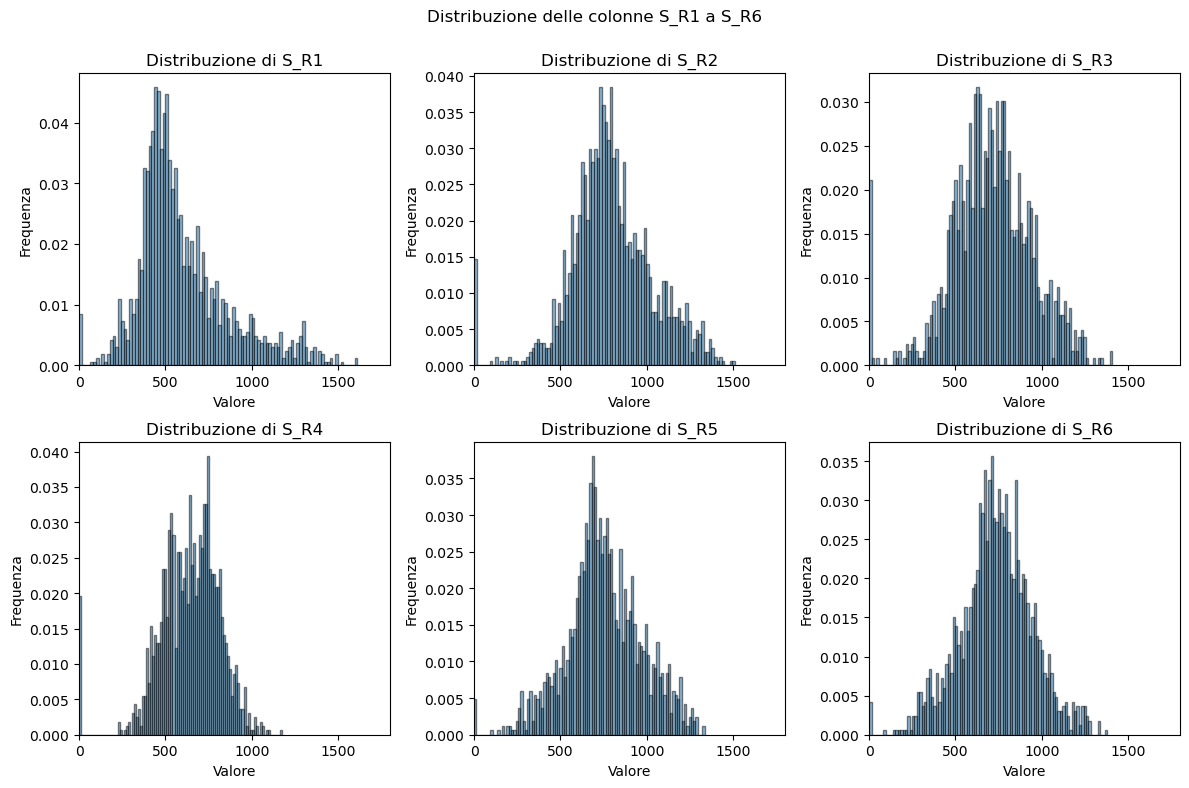

In [24]:
import matplotlib.pyplot as plt

# Lista dei nomi delle colonne
colonne = ['S_R1', 'S_R2', 'S_R3', 'S_R4', 'S_R5', 'S_R6']

# Lista dei dataframe
dataframes = [df_R1_new, df_R2_new, df_R3_new, df_R4_new, df_R5_new, df_R6_new]

# Crea un subplot con 2 righe e 3 colonne
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('Distribuzione delle colonne S_R1 a S_R6')

# Ciclo attraverso le colonne e i dataframe corrispondenti
for i, (colonna, dataframe) in enumerate(zip(colonne, dataframes)):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    frequenze_relative_percentuali = dataframe[colonna].value_counts(normalize=True) * 100
    ax.hist(dataframe[colonna], bins=100, edgecolor='k', alpha=0.5, weights=[1/len(dataframe)]*len(dataframe))
    ax.set_title(f'Distribuzione di {colonna}')
    ax.set_xlabel('Valore')
    ax.set_ylabel('Frequenza')
    ax.set_xlim(0, 1800)

# Aggiungi una legenda
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

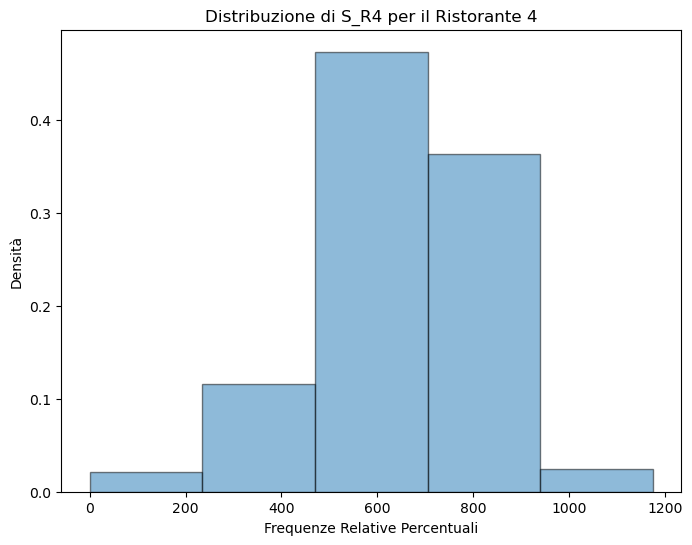

In [25]:
import matplotlib.pyplot as plt

# Seleziona solo il dataframe per il Ristorante 4
# Sostituisci con il tuo DataFrame del Ristorante 4
# Assicurati di aver importato il DataFrame df_R4_new

# Crea una figura e un asse
fig, ax = plt.subplots(figsize=(8, 6))

# Calcola le frequenze relative percentuali
frequenze_relative_percentuali = df_R4_new['S_R4'].value_counts(normalize=True) * 100

# Crea l'istogramma con le frequenze relative percentuali
ax.hist(df_R4_new['S_R4'], bins=5, edgecolor='k', alpha=0.5, weights=[1/len(df_R4_new)]*len(df_R4_new))
ax.set_title('Distribuzione di S_R4 per il Ristorante 4')
ax.set_xlabel('Frequenze Relative Percentuali')
ax.set_ylabel('Densità')

# Mostra il grafico
plt.show()

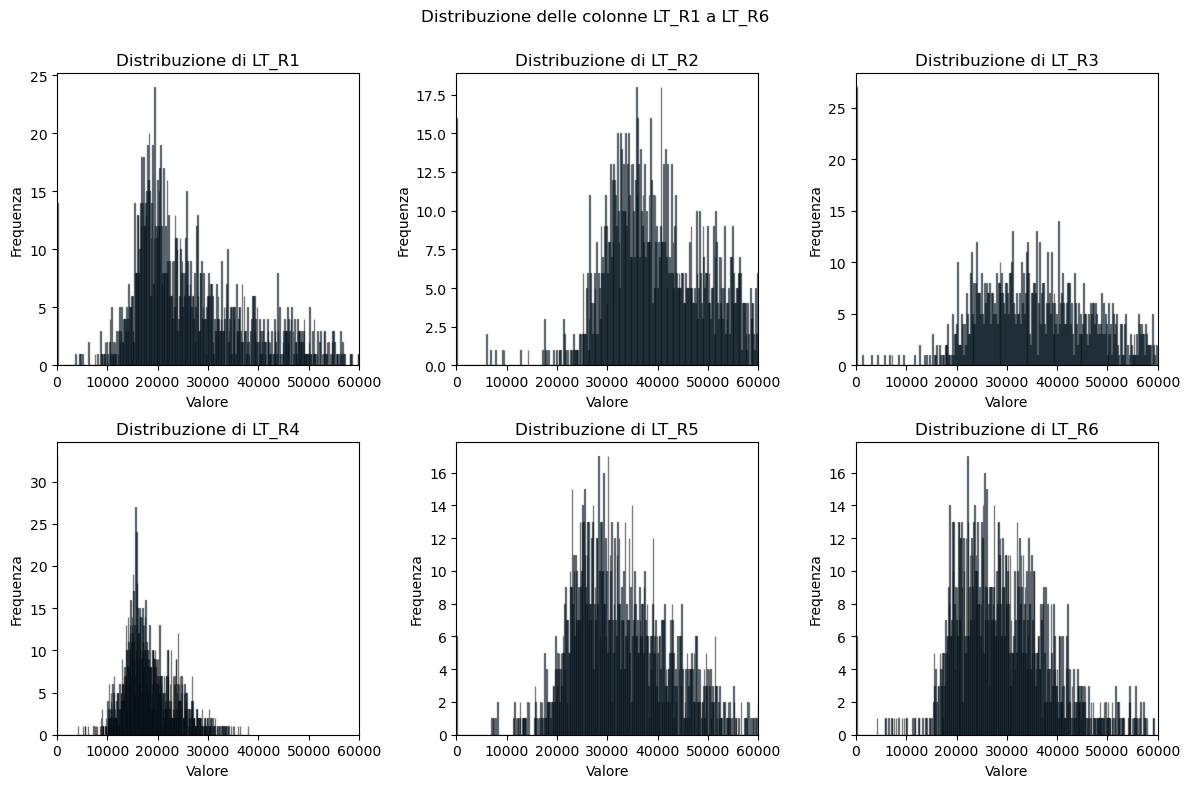

In [26]:
import matplotlib.pyplot as plt

# Lista dei nomi delle colonne
colonne = ['LT_R1', 'LT_R2', 'LT_R3', 'LT_R4', 'LT_R5', 'LT_R6']

# Lista dei dataframe
dataframes = [df_R1_new, df_R2_new, df_R3_new, df_R4_new, df_R5_new, df_R6_new]

# Crea un subplot con 2 righe e 3 colonne
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('Distribuzione delle colonne LT_R1 a LT_R6')

# Ciclo attraverso le colonne e i dataframe corrispondenti
for i, (colonna, dataframe) in enumerate(zip(colonne, dataframes)):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    ax.hist(dataframe[colonna], bins=500, edgecolor='k', alpha=0.5)
    ax.set_title(f'Distribuzione di {colonna}')
    ax.set_xlabel('Valore')
    ax.set_ylabel('Frequenza')
    ax.set_xlim(0, 60000)
    

# Aggiungi una legenda
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

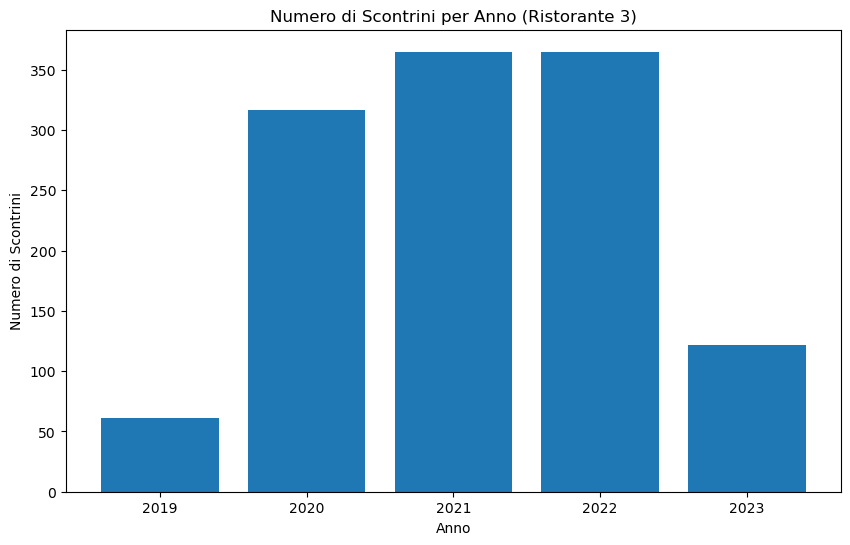

In [27]:
import matplotlib.pyplot as plt

# Filtra il DataFrame per il ristorante 3
df_R3 = df_R3_new

# Raggruppa per anno e conta il numero di scontrini per ogni anno
anno_counts = df_R3.groupby('Anno')['LT_R3'].count()

# Crea un grafico a barre per visualizzare il numero di scontrini rispetto agli anni
plt.figure(figsize=(10, 6))
plt.bar(anno_counts.index, anno_counts.values)
plt.title('Numero di Scontrini per Anno (Ristorante 3)')
plt.xlabel('Anno')
plt.ylabel('Numero di Scontrini')
plt.xticks(anno_counts.index)
plt.show()

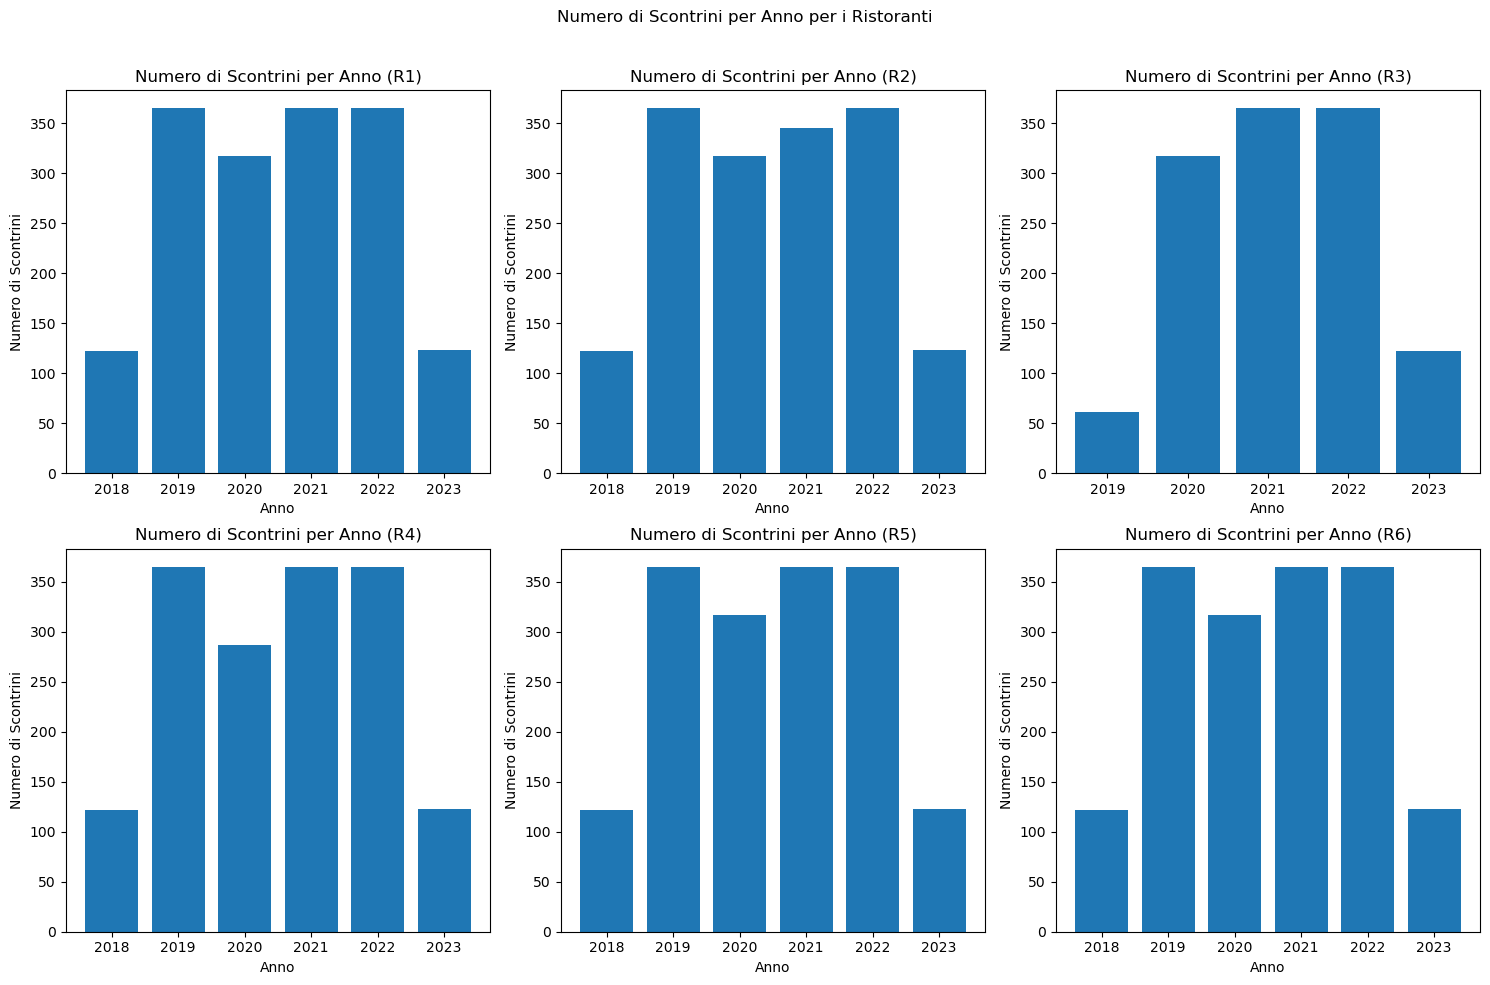

In [28]:
import matplotlib.pyplot as plt

# Lista dei nomi dei ristoranti
ristoranti = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']

# Supponiamo che tu abbia un dizionario di DataFrame con i nomi dei ristoranti come chiavi
dataframes = {
    'R1_new': df_R1_new,
    'R2_new': df_R2_new,
    'R3_new': df_R3_new,
    'R4_new': df_R4_new,
    'R5_new': df_R5_new,
    'R6_new': df_R6_new
}

# Crea una figura con subplot per ogni ristorante
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Numero di Scontrini per Anno per i Ristoranti')

# Ciclo attraverso i ristoranti
for i, ristorante in enumerate(ristoranti):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Ottieni il DataFrame corretto per il ristorante corrente
    df_ristorante = dataframes[ristorante + '_new']

    # Raggruppa per anno e conta il numero di scontrini per ogni anno
    anno_counts = df_ristorante.groupby('Anno')['LT_' + ristorante].count()

    # Crea un grafico a barre per il ristorante corrente
    ax.bar(anno_counts.index, anno_counts.values)
    ax.set_title(f'Numero di Scontrini per Anno ({ristorante})')
    ax.set_xlabel('Anno')
    ax.set_ylabel('Numero di Scontrini')
    ax.set_xticks(anno_counts.index)

# Aggiungi una legenda
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R1' and 'LT_R1' 

### Restaurant 1 dataframe

In [27]:
df_R1_new

,data,S_R1,LT_R1,Anno,Mese,day_of_week
243,2018-09-01,1276.0,50173.7180,2018,9,Saturday
244,2018-09-02,1070.0,43169.7749,2018,9,Sunday
245,2018-09-03,657.0,24781.9411,2018,9,Monday
246,2018-09-04,647.0,25100.7771,2018,9,Tuesday
247,2018-09-05,635.0,23516.6743,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1021.0,53106.1006,2023,4,Saturday
1945,2023-04-30,930.0,51591.7948,2023,4,Sunday
1946,2023-05-01,797.0,43892.8140,2023,5,Monday
1947,2023-05-02,509.0,24259.6613,2023,5,Tuesday


Install the required packages

In [28]:
#pip install scikit-learn

Import the necessary libraries

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### Split the dataset in train and test set

Train set

In [30]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R1_new[(df_R1_new['S_R1'] != 0) & (df_R1_new['LT_R1'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week
1119,2021-01-24,337.0,19048.2621,2021,1,Sunday
1616,2022-06-05,693.0,34834.4437,2022,6,Sunday
1353,2021-09-15,417.0,18720.2162,2021,9,Wednesday
1457,2021-12-28,699.0,35850.2172,2021,12,Tuesday
1020,2020-10-17,709.0,33862.9438,2020,10,Saturday
...,...,...,...,...,...,...
1436,2021-12-07,568.0,26653.8636,2021,12,Tuesday
1600,2022-05-20,496.0,23663.4132,2022,5,Friday
1163,2021-03-09,291.0,12822.5349,2021,3,Tuesday
1765,2022-11-01,756.0,39566.3086,2022,11,Tuesday


Count how many rows without zeroes values are present

In [31]:
count_rows = len(train_set[(train_set['S_R1'] == 0) & (train_set['LT_R1'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


dataset with 0 values

In [32]:
nullrows_set = df_R1_new[(df_R1_new['S_R1'] == 0) | (df_R1_new['LT_R1'] == 0) | (df_R1_new['S_R1'] == 0) & (df_R1_new['LT_R1'] == 0)]
nullrows_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.13,2020,4,Wednesday
851,2020-05-01,0.0,0.00,2020,5,Friday
852,2020-05-02,0.0,0.00,2020,5,Saturday
853,2020-05-03,0.0,0.00,2020,5,Sunday
854,2020-05-04,0.0,0.00,2020,5,Monday
855,2020-05-05,0.0,0.00,2020,5,Tuesday
856,2020-05-06,0.0,0.00,2020,5,Wednesday
1089,2020-12-25,0.0,0.00,2020,12,Friday
1090,2020-12-26,0.0,0.00,2020,12,Saturday
1096,2021-01-01,0.0,0.00,2021,1,Friday


In [33]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R1'] == 0) ^ (nullrows_set['LT_R1'] == 0)]
old_nullrows_variables

,data,S_R1,LT_R1,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.13,2020,4,Wednesday


Count how many rows with null values are present

In [34]:
count_rows = len(nullrows_set[(nullrows_set['S_R1'] == 0) | (nullrows_set['LT_R1'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 14


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [35]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [36]:
test_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
976,2020-09-03,504.0,21191.8560,2020,9,False,False,False,False,True,False,False
1406,2021-11-07,722.0,36303.9803,2021,11,False,False,False,True,False,False,False
1615,2022-06-04,624.0,29016.4714,2022,6,False,False,True,False,False,False,False
906,2020-06-25,412.0,18413.2746,2020,6,False,False,False,False,True,False,False
1701,2022-08-29,517.0,24434.2364,2022,8,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
549,2019-07-04,585.0,20276.7719,2019,7,False,False,False,False,True,False,False
435,2019-03-12,461.0,16704.6110,2019,3,False,False,False,False,False,True,False
552,2019-07-07,1099.0,41060.4187,2019,7,False,False,False,True,False,False,False
953,2020-08-11,397.0,18317.2108,2020,8,False,False,False,False,False,True,False


In [37]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Monday'] = nullrows_set['day_of_week_Monday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Tuesday'] = nullrows_set['day_of_week_Tuesday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)

train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R1                            float64
LT_R1                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

Show the new trian_set

In [38]:
train_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1119,2021-01-24,337.0,19048.2621,2021,1,0,0,0,1,0,0,0
1616,2022-06-05,693.0,34834.4437,2022,6,0,0,0,1,0,0,0
1353,2021-09-15,417.0,18720.2162,2021,9,0,0,0,0,0,0,1
1457,2021-12-28,699.0,35850.2172,2021,12,0,0,0,0,0,1,0
1020,2020-10-17,709.0,33862.9438,2020,10,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2021-12-07,568.0,26653.8636,2021,12,0,0,0,0,0,1,0
1600,2022-05-20,496.0,23663.4132,2022,5,1,0,0,0,0,0,0
1163,2021-03-09,291.0,12822.5349,2021,3,0,0,0,0,0,1,0
1765,2022-11-01,756.0,39566.3086,2022,11,0,0,0,0,0,1,0


Show the new test_set

In [39]:
test_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
976,2020-09-03,504.0,21191.8560,2020,9,0,0,0,0,1,0,0
1406,2021-11-07,722.0,36303.9803,2021,11,0,0,0,1,0,0,0
1615,2022-06-04,624.0,29016.4714,2022,6,0,0,1,0,0,0,0
906,2020-06-25,412.0,18413.2746,2020,6,0,0,0,0,1,0,0
1701,2022-08-29,517.0,24434.2364,2022,8,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
549,2019-07-04,585.0,20276.7719,2019,7,0,0,0,0,1,0,0
435,2019-03-12,461.0,16704.6110,2019,3,0,0,0,0,0,1,0
552,2019-07-07,1099.0,41060.4187,2019,7,0,0,0,1,0,0,0
953,2020-08-11,397.0,18317.2108,2020,8,0,0,0,0,0,1,0


In [40]:
nullrows_set['day_of_week_Thursday'] = 0
nullrows_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday
821,2020-04-01,0.0,4.13,2020,4,0,0,0,0,0,1,0
851,2020-05-01,0.0,0.00,2020,5,1,0,0,0,0,0,0
852,2020-05-02,0.0,0.00,2020,5,0,0,1,0,0,0,0
853,2020-05-03,0.0,0.00,2020,5,0,0,0,1,0,0,0
854,2020-05-04,0.0,0.00,2020,5,0,1,0,0,0,0,0
855,2020-05-05,0.0,0.00,2020,5,0,0,0,0,1,0,0
856,2020-05-06,0.0,0.00,2020,5,0,0,0,0,0,1,0
1089,2020-12-25,0.0,0.00,2020,12,1,0,0,0,0,0,0
1090,2020-12-26,0.0,0.00,2020,12,0,0,1,0,0,0,0
1096,2021-01-01,0.0,0.00,2021,1,1,0,0,0,0,0,0


Define the columns for the train set and the test set

In [41]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR1 = train_set['S_R1']
y_train_LTR1 = train_set['LT_R1']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

Train two Random Forest models, one for 'S_R1' and one for 'LT_R1'

In [42]:
from sklearn.model_selection import GridSearchCV
model_SR1 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR1 = GridSearchCV(model_SR1, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR1.fit(X_train, y_train_SR1)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR1 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR1 = GridSearchCV(model_LTR1, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR1.fit(X_train, y_train_LTR1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

Make predictions for the missing values.

In [43]:
predicted_SR1 = model_SR1.predict(X_test)
predicted_LTR1 = model_LTR1.predict(X_test)

Assign the interpolated values to the original test set.

In [44]:
test_set['S_R1_predicted'] = predicted_SR1
test_set['LT_R1_predicted'] = predicted_LTR1
test_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R1_predicted,LT_R1_predicted
976,2020-09-03,504.0,21191.8560,2020,9,0,0,0,0,1,0,0,456.540517,19151.849299
1406,2021-11-07,722.0,36303.9803,2021,11,0,0,0,1,0,0,0,687.674412,35926.165623
1615,2022-06-04,624.0,29016.4714,2022,6,0,0,1,0,0,0,0,755.483436,38849.029789
906,2020-06-25,412.0,18413.2746,2020,6,0,0,0,0,1,0,0,384.946419,18541.144276
1701,2022-08-29,517.0,24434.2364,2022,8,0,1,0,0,0,0,0,482.279999,24569.726139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2019-07-04,585.0,20276.7719,2019,7,0,0,0,0,1,0,0,637.460905,21121.093567
435,2019-03-12,461.0,16704.6110,2019,3,0,0,0,0,0,1,0,510.796854,15630.227321
552,2019-07-07,1099.0,41060.4187,2019,7,0,0,0,1,0,0,0,1056.474786,39789.621529
953,2020-08-11,397.0,18317.2108,2020,8,0,0,0,0,0,1,0,448.246897,19306.260883


In [45]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R1']
y_true_lt = test_set['LT_R1']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R1_predicted']
y_pred_lt = test_set['LT_R1_predicted']

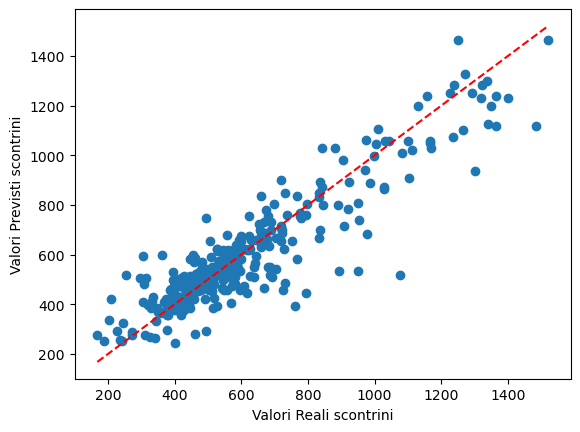

In [46]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

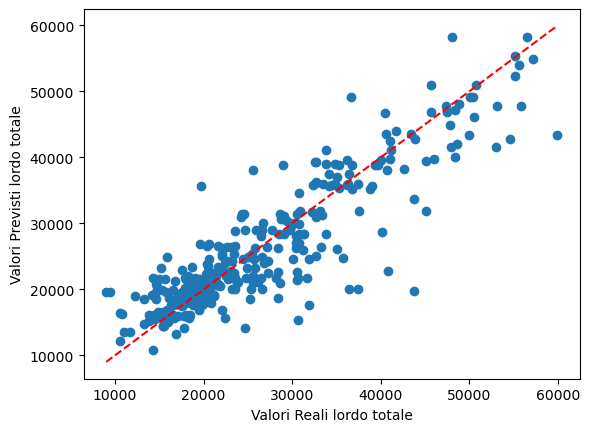

In [47]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.8320571136573801


In [49]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.7910592792761767


In [50]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR1_nr = model_SR1.predict(prediction_set)
predicted_LTR1_nr = model_LTR1.predict(prediction_set)

In [51]:
nullrows_set['S_R1'] = predicted_SR1_nr
nullrows_set['LT_R1'] = predicted_LTR1_nr

In [52]:
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R1_x,LT_R1_x,Anno_x,Mese_x,day_of_week,data_y,S_R1_y,LT_R1_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday
821,2020-04-01,0.0,4.13,2020,4,Wednesday,2020-04-01,284.362421,17257.969501,2020,4,0,0,0,0,0,1,0


In [53]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R1_x']
        lt_new = common_index_rows.loc[idx, 'LT_R1_y']
        lt_corrente = row['LT_R1']
        s_old = common_index_rows.loc[idx, 'S_R1_x']
        s_new = common_index_rows.loc[idx, 'S_R1_y']
        s_corrente = row['S_R1']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R1'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R1'] = lt_new
        if s_old != 0:
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R1'] = s_old
            else:
                nullrows_set.at[idx, 'S_R1'] = s_new

# Mostra il test_set con le modifiche
nullrows_set

,data,S_R1,LT_R1,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday
821,2020-04-01,0.000000,17257.969501,2020,4,0,0,0,0,0,1,0
851,2020-05-01,286.489439,19538.448012,2020,5,1,0,0,0,0,0,0
852,2020-05-02,507.583818,26584.260541,2020,5,0,0,1,0,0,0,0
853,2020-05-03,420.879173,23302.724334,2020,5,0,0,0,1,0,0,0
854,2020-05-04,268.197474,16560.527574,2020,5,0,1,0,0,0,0,0
855,2020-05-05,277.600170,15950.142692,2020,5,0,0,0,0,1,0,0
856,2020-05-06,281.552056,17484.722329,2020,5,0,0,0,0,0,1,0
1089,2020-12-25,440.000107,23106.149298,2020,12,1,0,0,0,0,0,0
1090,2020-12-26,371.747280,21027.188719,2020,12,0,0,1,0,0,0,0
1096,2021-01-01,398.543563,23991.662910,2021,1,1,0,0,0,0,0,0


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [54]:
final_data_R1 = pd.concat([train_set, test_set, nullrows_set])

final_data_R1['day_of_week'] = final_data_R1[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R1 = final_data_R1.drop(['S_R1_predicted', 'LT_R1_predicted', 'day_of_week_Monday','day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R1['day_of_week'] = final_data_R1['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R1 = final_data_R1.sort_values(by='data')

final_data_R1

,data,S_R1,LT_R1,Anno,Mese,day_of_week
243,2018-09-01,1276.0,50173.7180,2018,9,Saturday
244,2018-09-02,1070.0,43169.7749,2018,9,Sunday
245,2018-09-03,657.0,24781.9411,2018,9,Monday
246,2018-09-04,647.0,25100.7771,2018,9,Tuesday
247,2018-09-05,635.0,23516.6743,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1021.0,53106.1006,2023,4,Saturday
1945,2023-04-30,930.0,51591.7948,2023,4,Sunday
1946,2023-05-01,797.0,43892.8140,2023,5,Monday
1947,2023-05-02,509.0,24259.6613,2023,5,Tuesday


Check the type of the data in the dataset

In [55]:
final_data_R1.dtypes

data           datetime64[ns]
S_R1                  float64
LT_R1                 float64
Anno                    int32
Mese                    int32
day_of_week            object
dtype: object

In [56]:
df_R1_new=final_data_R1
df_R1_new

,data,S_R1,LT_R1,Anno,Mese,day_of_week
243,2018-09-01,1276.0,50173.7180,2018,9,Saturday
244,2018-09-02,1070.0,43169.7749,2018,9,Sunday
245,2018-09-03,657.0,24781.9411,2018,9,Monday
246,2018-09-04,647.0,25100.7771,2018,9,Tuesday
247,2018-09-05,635.0,23516.6743,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1021.0,53106.1006,2023,4,Saturday
1945,2023-04-30,930.0,51591.7948,2023,4,Sunday
1946,2023-05-01,797.0,43892.8140,2023,5,Monday
1947,2023-05-02,509.0,24259.6613,2023,5,Tuesday


In [57]:
count_rows = len(final_data_R1[(final_data_R1['S_R1'] == 0) | (final_data_R1['LT_R1'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 1


## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R2' and 'LT_R2' 

### Restaurant 2 dataframe

In [58]:
df_R2_new

,data,S_R2,LT_R2,Anno,Mese,day_of_week
243,2018-09-01,1238.0,58917.8366,2018,9,Saturday
244,2018-09-02,971.0,48995.3464,2018,9,Sunday
245,2018-09-03,782.0,36185.5732,2018,9,Monday
246,2018-09-04,793.0,36402.4808,2018,9,Tuesday
247,2018-09-05,758.0,33679.4066,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1220.0,74606.3437,2023,4,Saturday
1945,2023-04-30,1016.0,68179.6507,2023,4,Sunday
1946,2023-05-01,0.0,67024.9027,2023,5,Monday
1947,2023-05-02,806.0,43551.6347,2023,5,Tuesday


In [59]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R2_new[(df_R2_new['S_R2'] != 0) & (df_R2_new['LT_R2'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week
1655,2022-07-14,759.0,43029.2310,2022,7,Thursday
1407,2021-11-08,550.0,29587.8569,2021,11,Monday
1261,2021-06-15,694.0,36280.6458,2021,6,Tuesday
1205,2021-04-20,553.0,30276.0388,2021,4,Tuesday
1283,2021-07-07,669.0,32715.1342,2021,7,Wednesday
...,...,...,...,...,...,...
1457,2021-12-28,800.0,45732.6877,2021,12,Tuesday
1623,2022-06-12,827.0,46185.8726,2022,6,Sunday
1157,2021-03-03,530.0,28713.7424,2021,3,Wednesday
1794,2022-11-30,794.0,42907.6851,2022,11,Wednesday


In [60]:
count_rows = len(train_set[(train_set['S_R2'] == 0) & (train_set['LT_R2'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


In [61]:
nullrows_set = df_R2_new[(df_R2_new['S_R2'] == 0) | (df_R2_new['LT_R2'] == 0) | (df_R2_new['S_R2'] == 0) & (df_R2_new['LT_R2'] == 0)]
nullrows_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
851,2020-05-01,0.0,0.0000,2020,5,Friday
852,2020-05-02,0.0,0.0000,2020,5,Saturday
853,2020-05-03,0.0,0.0000,2020,5,Sunday
1089,2020-12-25,0.0,0.0000,2020,12,Friday
1189,2021-04-04,0.0,0.0000,2021,4,Sunday
1365,2021-09-27,0.0,0.0000,2021,9,Monday
1366,2021-09-28,0.0,0.0000,2021,9,Tuesday
1367,2021-09-29,0.0,0.0000,2021,9,Wednesday
1368,2021-09-30,0.0,0.0000,2021,9,Thursday


In [62]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R2'] == 0) ^ (nullrows_set['LT_R2'] == 0)]
old_nullrows_variables

,data,S_R2,LT_R2,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
1389,2021-10-21,0.0,30951.6242,2021,10,Thursday
1390,2021-10-22,0.0,46633.8537,2021,10,Friday
1391,2021-10-23,0.0,56391.4743,2021,10,Saturday
1392,2021-10-24,0.0,44958.4779,2021,10,Sunday
1393,2021-10-25,0.0,32883.0600,2021,10,Monday
1459,2021-12-30,0.0,45868.9364,2021,12,Thursday
1579,2022-04-29,0.0,52938.0096,2022,4,Friday
1946,2023-05-01,0.0,67024.9027,2023,5,Monday


In [63]:
count_rows = len(test_set[(test_set['S_R2'] == 0) | (test_set['LT_R2'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [64]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [65]:
test_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
272,2018-09-30,935.0,46204.5815,2018,9,False,False,False,True,False,False,False
502,2019-05-18,1364.0,64353.7013,2019,5,False,False,True,False,False,False,False
626,2019-09-19,1003.0,44740.4965,2019,9,False,False,False,False,True,False,False
668,2019-10-31,1421.0,68052.0337,2019,10,False,False,False,False,True,False,False
482,2019-04-28,990.0,48323.1476,2019,4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2021-07-21,687.0,33663.7952,2021,7,False,False,False,False,False,False,True
1893,2023-03-09,767.0,40421.0121,2023,3,False,False,False,False,True,False,False
756,2020-01-27,680.0,31613.2915,2020,1,False,True,False,False,False,False,False
665,2019-10-28,767.0,35710.1276,2019,10,False,True,False,False,False,False,False


In [66]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Monday'] = nullrows_set['day_of_week_Monday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Tuesday'] = nullrows_set['day_of_week_Tuesday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)
nullrows_set['day_of_week_Thursday'] = nullrows_set['day_of_week_Thursday'].astype(int)


train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R2                            float64
LT_R2                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

In [67]:
train_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1655,2022-07-14,759.0,43029.2310,2022,7,0,0,0,0,1,0,0
1407,2021-11-08,550.0,29587.8569,2021,11,0,1,0,0,0,0,0
1261,2021-06-15,694.0,36280.6458,2021,6,0,0,0,0,0,1,0
1205,2021-04-20,553.0,30276.0388,2021,4,0,0,0,0,0,1,0
1283,2021-07-07,669.0,32715.1342,2021,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2021-12-28,800.0,45732.6877,2021,12,0,0,0,0,0,1,0
1623,2022-06-12,827.0,46185.8726,2022,6,0,0,0,1,0,0,0
1157,2021-03-03,530.0,28713.7424,2021,3,0,0,0,0,0,0,1
1794,2022-11-30,794.0,42907.6851,2022,11,0,0,0,0,0,0,1


In [68]:
test_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
272,2018-09-30,935.0,46204.5815,2018,9,0,0,0,1,0,0,0
502,2019-05-18,1364.0,64353.7013,2019,5,0,0,1,0,0,0,0
626,2019-09-19,1003.0,44740.4965,2019,9,0,0,0,0,1,0,0
668,2019-10-31,1421.0,68052.0337,2019,10,0,0,0,0,1,0,0
482,2019-04-28,990.0,48323.1476,2019,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2021-07-21,687.0,33663.7952,2021,7,0,0,0,0,0,0,1
1893,2023-03-09,767.0,40421.0121,2023,3,0,0,0,0,1,0,0
756,2020-01-27,680.0,31613.2915,2020,1,0,1,0,0,0,0,0
665,2019-10-28,767.0,35710.1276,2019,10,0,1,0,0,0,0,0


In [69]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR2 = train_set['S_R2']
y_train_LTR2 = train_set['LT_R2']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

In [70]:
from sklearn.model_selection import GridSearchCV
model_SR2 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR2 = GridSearchCV(model_SR2, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR2.fit(X_train, y_train_SR2)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR2 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR2 = GridSearchCV(model_LTR2, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR2.fit(X_train, y_train_LTR2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [71]:
predicted_SR2 = model_SR2.predict(X_test)
predicted_LTR2 = model_LTR2.predict(X_test)

In [72]:
test_set['S_R2_predicted'] = predicted_SR2
test_set['LT_R2_predicted'] = predicted_LTR2
test_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R2_predicted,LT_R2_predicted
272,2018-09-30,935.0,46204.5815,2018,9,0,0,0,1,0,0,0,951.143935,48770.741775
502,2019-05-18,1364.0,64353.7013,2019,5,0,0,1,0,0,0,0,1287.550450,63747.094230
626,2019-09-19,1003.0,44740.4965,2019,9,0,0,0,0,1,0,0,901.484214,39546.873531
668,2019-10-31,1421.0,68052.0337,2019,10,0,0,0,0,1,0,0,810.641858,36286.535848
482,2019-04-28,990.0,48323.1476,2019,4,0,0,0,1,0,0,0,884.768764,48017.059174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2021-07-21,687.0,33663.7952,2021,7,0,0,0,0,0,0,1,658.952657,35232.297735
1893,2023-03-09,767.0,40421.0121,2023,3,0,0,0,0,1,0,0,825.920769,50011.712105
756,2020-01-27,680.0,31613.2915,2020,1,0,1,0,0,0,0,0,698.332506,29903.437324
665,2019-10-28,767.0,35710.1276,2019,10,0,1,0,0,0,0,0,724.169821,31725.339266


In [73]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R2']
y_true_lt = test_set['LT_R2']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R2_predicted']
y_pred_lt = test_set['LT_R2_predicted']

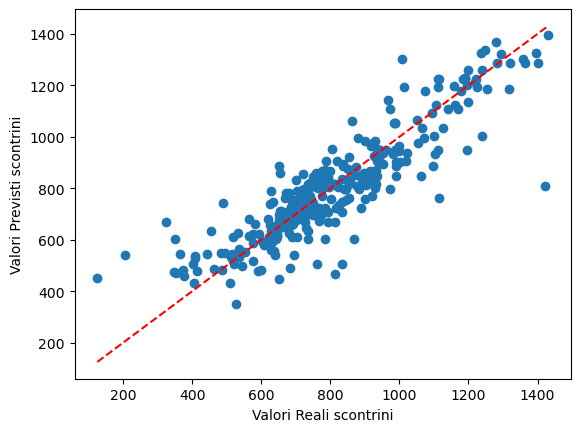

In [74]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

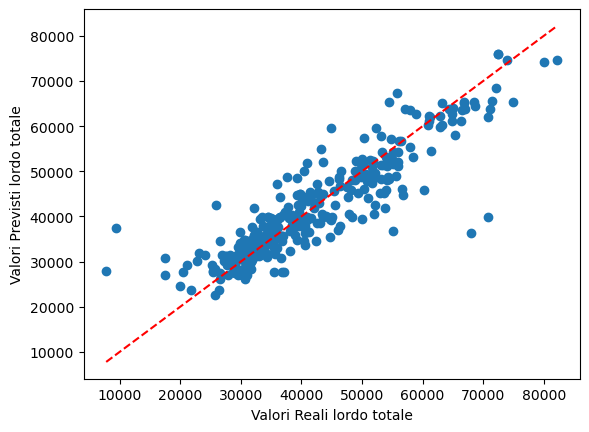

In [75]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.7885629959360182


In [77]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.7996989207052375


In [78]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR2_nr = model_SR2.predict(prediction_set)
predicted_LTR2_nr = model_LTR2.predict(prediction_set)

In [79]:
nullrows_set['S_R2'] = predicted_SR2_nr
nullrows_set['LT_R2'] = predicted_LTR2_nr

In [80]:
# Unisci i dataframe utilizzando l'indice comune
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R2_x,LT_R2_x,Anno_x,Mese_x,day_of_week,data_y,S_R2_y,LT_R2_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
821,2020-04-01,0.0,4.1300,2020,4,Wednesday,2020-04-01,434.003562,28553.520283,2020,4,0,0,0,0,0,0,1
1389,2021-10-21,0.0,30951.6242,2021,10,Thursday,2021-10-21,720.126387,40023.845310,2021,10,0,0,0,0,1,0,0
1390,2021-10-22,0.0,46633.8537,2021,10,Friday,2021-10-22,823.104673,48452.134174,2021,10,1,0,0,0,0,0,0
1391,2021-10-23,0.0,56391.4743,2021,10,Saturday,2021-10-23,933.955036,54023.250334,2021,10,0,0,1,0,0,0,0
1392,2021-10-24,0.0,44958.4779,2021,10,Sunday,2021-10-24,801.238798,48528.544299,2021,10,0,0,0,1,0,0,0
1393,2021-10-25,0.0,32883.0600,2021,10,Monday,2021-10-25,680.072632,36517.775961,2021,10,0,1,0,0,0,0,0
1459,2021-12-30,0.0,45868.9364,2021,12,Thursday,2021-12-30,724.453136,36858.984214,2021,12,0,0,0,0,1,0,0
1579,2022-04-29,0.0,52938.0096,2022,4,Friday,2022-04-29,849.363399,51613.384855,2022,4,1,0,0,0,0,0,0
1946,2023-05-01,0.0,67024.9027,2023,5,Monday,2023-05-01,809.457789,43780.017941,2023,5,0,1,0,0,0,0,0


In [81]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R2_x']
        lt_new = common_index_rows.loc[idx, 'LT_R2_y']
        lt_corrente = row['LT_R2']
        s_old = common_index_rows.loc[idx, 'S_R2_x']
        s_new = common_index_rows.loc[idx, 'S_R2_y']
        s_corrente = row['S_R2']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R2'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R2'] = lt_new
        if s_old !=0 :
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R2'] = s_old
            else:
                nullrows_set.at[idx, 'S_R2'] = s_new

# Mostra il test_set con le modifiche
nullrows_set

,data,S_R2,LT_R2,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
821,2020-04-01,434.003562,28553.520283,2020,4,0,0,0,0,0,0,1
851,2020-05-01,489.788834,36502.815910,2020,5,1,0,0,0,0,0,0
852,2020-05-02,633.134410,41946.653610,2020,5,0,0,1,0,0,0,0
853,2020-05-03,538.502207,35336.494864,2020,5,0,0,0,1,0,0,0
1089,2020-12-25,627.189504,35573.203472,2020,12,1,0,0,0,0,0,0
1189,2021-04-04,560.216344,35625.343084,2021,4,0,0,0,1,0,0,0
1365,2021-09-27,719.830367,36669.251654,2021,9,0,1,0,0,0,0,0
1366,2021-09-28,716.306802,36312.570934,2021,9,0,0,0,0,0,1,0
1367,2021-09-29,768.915602,39572.749053,2021,9,0,0,0,0,0,0,1
1368,2021-09-30,771.424107,40487.391055,2021,9,0,0,0,0,1,0,0


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [82]:
final_data_R2 = pd.concat([train_set, test_set,nullrows_set])

final_data_R2['day_of_week'] = final_data_R2[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R2 = final_data_R2.drop(['S_R2_predicted', 'LT_R2_predicted', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R2['day_of_week'] = final_data_R2['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R2 = final_data_R2.sort_values(by='data')

final_data_R2

,data,S_R2,LT_R2,Anno,Mese,day_of_week
243,2018-09-01,1238.000000,58917.836600,2018,9,Saturday
244,2018-09-02,971.000000,48995.346400,2018,9,Sunday
245,2018-09-03,782.000000,36185.573200,2018,9,Monday
246,2018-09-04,793.000000,36402.480800,2018,9,Tuesday
247,2018-09-05,758.000000,33679.406600,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1220.000000,74606.343700,2023,4,Saturday
1945,2023-04-30,1016.000000,68179.650700,2023,4,Sunday
1946,2023-05-01,809.457789,43780.017941,2023,5,Monday
1947,2023-05-02,806.000000,43551.634700,2023,5,Tuesday


In [83]:
final_data_R2.dtypes

data           datetime64[ns]
S_R2                  float64
LT_R2                 float64
Anno                    int32
Mese                    int32
day_of_week            object
dtype: object

In [84]:
df_R2_new=final_data_R2
df_R2_new

,data,S_R2,LT_R2,Anno,Mese,day_of_week
243,2018-09-01,1238.000000,58917.836600,2018,9,Saturday
244,2018-09-02,971.000000,48995.346400,2018,9,Sunday
245,2018-09-03,782.000000,36185.573200,2018,9,Monday
246,2018-09-04,793.000000,36402.480800,2018,9,Tuesday
247,2018-09-05,758.000000,33679.406600,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1220.000000,74606.343700,2023,4,Saturday
1945,2023-04-30,1016.000000,68179.650700,2023,4,Sunday
1946,2023-05-01,809.457789,43780.017941,2023,5,Monday
1947,2023-05-02,806.000000,43551.634700,2023,5,Tuesday


In [85]:
count_rows = len(final_data_R2[(final_data_R2['S_R2'] == 0) | (final_data_R2['LT_R2'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R3' and 'LT_R3' 

### Restaurant 3 dataframe

In [176]:
df_R3_new

,data,S_R3,LT_R3,Anno,Mese,day_of_week
669,2019-11-01,0.0,0.0000,2019,11,Friday
670,2019-11-02,0.0,0.0000,2019,11,Saturday
671,2019-11-03,0.0,0.0000,2019,11,Sunday
672,2019-11-04,0.0,0.0000,2019,11,Monday
673,2019-11-05,0.0,0.0000,2019,11,Tuesday
...,...,...,...,...,...,...
1943,2023-04-28,1132.0,61851.0039,2023,4,Friday
1944,2023-04-29,1230.0,72773.2845,2023,4,Saturday
1945,2023-04-30,1111.0,64834.1442,2023,4,Sunday
1946,2023-05-01,901.0,55226.0709,2023,5,Monday


In [177]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R3_new[(df_R3_new['S_R3'] != 0) & (df_R3_new['LT_R3'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week
1458,2021-12-29,714.0,40664.2278,2021,12,Wednesday
1038,2020-11-04,512.0,23698.9312,2020,11,Wednesday
1260,2021-06-14,579.0,25616.1185,2021,6,Monday
1266,2021-06-20,768.0,38749.8489,2021,6,Sunday
759,2020-01-30,638.0,25481.0675,2020,1,Thursday
...,...,...,...,...,...,...
1789,2022-11-25,1020.0,53926.7316,2022,11,Friday
1840,2023-01-15,1091.0,67739.7644,2023,1,Sunday
1875,2023-02-19,947.0,56530.7792,2023,2,Sunday
1598,2022-05-18,789.0,37933.6783,2022,5,Wednesday


In [178]:
count_rows = len(train_set[(train_set['S_R3'] == 0) & (train_set['LT_R3'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


In [179]:
nullrows_set = df_R3_new[(df_R3_new['S_R3'] == 0) | (df_R3_new['LT_R3'] == 0) | (df_R3_new['S_R3'] == 0) & (df_R3_new['LT_R3'] == 0)]
nullrows_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week
669,2019-11-01,0.0,0.00,2019,11,Friday
670,2019-11-02,0.0,0.00,2019,11,Saturday
671,2019-11-03,0.0,0.00,2019,11,Sunday
672,2019-11-04,0.0,0.00,2019,11,Monday
673,2019-11-05,0.0,0.00,2019,11,Tuesday
674,2019-11-06,0.0,0.00,2019,11,Wednesday
675,2019-11-07,0.0,0.00,2019,11,Thursday
821,2020-04-01,0.0,4.13,2020,4,Wednesday
851,2020-05-01,0.0,0.00,2020,5,Friday
852,2020-05-02,0.0,0.00,2020,5,Saturday


In [180]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R3'] == 0) ^ (nullrows_set['LT_R3'] == 0)]
old_nullrows_variables

,data,S_R3,LT_R3,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.13,2020,4,Wednesday
1565,2022-04-15,831.0,0.00,2022,4,Friday


In [181]:
count_rows = len(test_set[(test_set['S_R3'] == 0) | (test_set['LT_R3'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [182]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [183]:
test_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1878,2023-02-22,717.0,35986.1355,2023,2,False,False,False,False,False,False,True
1160,2021-03-06,626.0,36577.8819,2021,3,False,False,True,False,False,False,False
754,2020-01-25,1167.0,49070.5537,2020,1,False,False,True,False,False,False,False
1540,2022-03-21,555.0,25305.2947,2022,3,False,True,False,False,False,False,False
1327,2021-08-20,776.0,41424.7260,2021,8,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2020-10-21,573.0,26642.2170,2020,10,False,False,False,False,False,False,True
1663,2022-07-22,857.0,48210.5638,2022,7,True,False,False,False,False,False,False
1006,2020-10-03,971.0,45613.7850,2020,10,False,False,True,False,False,False,False
1368,2021-09-30,705.0,47738.8765,2021,9,False,False,False,False,True,False,False


In [184]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Monday'] = nullrows_set['day_of_week_Monday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Tuesday'] = nullrows_set['day_of_week_Tuesday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)
nullrows_set['day_of_week_Thursday'] = nullrows_set['day_of_week_Thursday'].astype(int)


train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R3                            float64
LT_R3                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

In [185]:
train_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1458,2021-12-29,714.0,40664.2278,2021,12,0,0,0,0,0,0,1
1038,2020-11-04,512.0,23698.9312,2020,11,0,0,0,0,0,0,1
1260,2021-06-14,579.0,25616.1185,2021,6,0,1,0,0,0,0,0
1266,2021-06-20,768.0,38749.8489,2021,6,0,0,0,1,0,0,0
759,2020-01-30,638.0,25481.0675,2020,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,2022-11-25,1020.0,53926.7316,2022,11,1,0,0,0,0,0,0
1840,2023-01-15,1091.0,67739.7644,2023,1,0,0,0,1,0,0,0
1875,2023-02-19,947.0,56530.7792,2023,2,0,0,0,1,0,0,0
1598,2022-05-18,789.0,37933.6783,2022,5,0,0,0,0,0,0,1


In [186]:
test_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1878,2023-02-22,717.0,35986.1355,2023,2,0,0,0,0,0,0,1
1160,2021-03-06,626.0,36577.8819,2021,3,0,0,1,0,0,0,0
754,2020-01-25,1167.0,49070.5537,2020,1,0,0,1,0,0,0,0
1540,2022-03-21,555.0,25305.2947,2022,3,0,1,0,0,0,0,0
1327,2021-08-20,776.0,41424.7260,2021,8,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2020-10-21,573.0,26642.2170,2020,10,0,0,0,0,0,0,1
1663,2022-07-22,857.0,48210.5638,2022,7,1,0,0,0,0,0,0
1006,2020-10-03,971.0,45613.7850,2020,10,0,0,1,0,0,0,0
1368,2021-09-30,705.0,47738.8765,2021,9,0,0,0,0,1,0,0


In [187]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR3 = train_set['S_R3']
y_train_LTR3 = train_set['LT_R3']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

In [189]:
from sklearn.model_selection import GridSearchCV
model_SR3 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR3 = GridSearchCV(model_SR3, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR3.fit(X_train, y_train_SR3)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR3 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR3 = GridSearchCV(model_LTR3, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR3.fit(X_train, y_train_LTR3)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [190]:
predicted_SR3 = model_SR3.predict(X_test)
predicted_LTR3 = model_LTR3.predict(X_test)

In [191]:
test_set['S_R3_predicted'] = predicted_SR3
test_set['LT_R3_predicted'] = predicted_LTR3
test_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R3_predicted,LT_R3_predicted
1878,2023-02-22,717.0,35986.1355,2023,2,0,0,0,0,0,0,1,768.228254,40771.625894
1160,2021-03-06,626.0,36577.8819,2021,3,0,0,1,0,0,0,0,662.047121,42187.795921
754,2020-01-25,1167.0,49070.5537,2020,1,0,0,1,0,0,0,0,1127.210771,49193.490596
1540,2022-03-21,555.0,25305.2947,2022,3,0,1,0,0,0,0,0,572.322210,27436.243832
1327,2021-08-20,776.0,41424.7260,2021,8,1,0,0,0,0,0,0,788.840501,42194.687154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2020-10-21,573.0,26642.2170,2020,10,0,0,0,0,0,0,1,615.360886,26801.868818
1663,2022-07-22,857.0,48210.5638,2022,7,1,0,0,0,0,0,0,910.359896,49394.819791
1006,2020-10-03,971.0,45613.7850,2020,10,0,0,1,0,0,0,0,834.517706,45667.228187
1368,2021-09-30,705.0,47738.8765,2021,9,0,0,0,0,1,0,0,733.420209,37088.286421


In [192]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R3']
y_true_lt = test_set['LT_R3']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R3_predicted']
y_pred_lt = test_set['LT_R3_predicted']

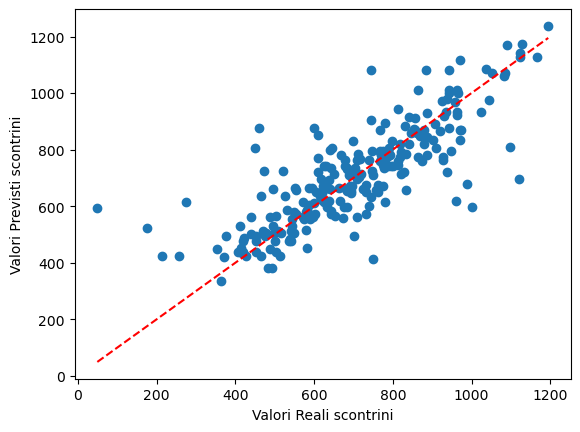

In [193]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

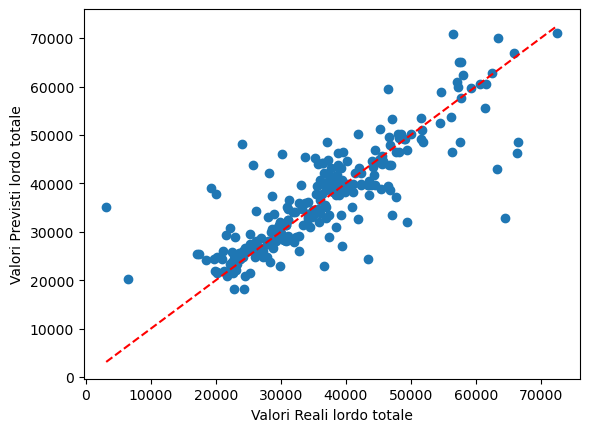

In [194]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [195]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.6439852839538647


In [196]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.6804054983959346


In [197]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR3_nr = model_SR3.predict(prediction_set)
predicted_LTR3_nr = model_LTR3.predict(prediction_set)

In [198]:
nullrows_set['S_R3'] = predicted_SR3_nr
nullrows_set['LT_R3'] = predicted_LTR3_nr

In [199]:
# Unisci i dataframe utilizzando l'indice comune
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R3_x,LT_R3_x,Anno_x,Mese_x,day_of_week,data_y,S_R3_y,LT_R3_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
821,2020-04-01,0.0,4.13,2020,4,Wednesday,2020-04-01,392.323358,16344.008306,2020,4,0,0,0,0,0,0,1
1565,2022-04-15,831.0,0.00,2022,4,Friday,2022-04-15,891.408247,49195.822957,2022,4,1,0,0,0,0,0,0


In [200]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R3_x']
        lt_new = common_index_rows.loc[idx, 'LT_R3_y']
        lt_corrente = row['LT_R3']
        s_old = common_index_rows.loc[idx, 'S_R3_x']
        s_new = common_index_rows.loc[idx, 'S_R3_y']
        s_corrente = row['S_R3']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R3'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R3'] = lt_new
        if s_old !=0 :
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R3'] = s_old
            else:
                nullrows_set.at[idx, 'S_R3'] = s_new

# Mostra il test_set con le modifiche
nullrows_set

,data,S_R3,LT_R3,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
669,2019-11-01,1157.038567,45582.706344,2019,11,1,0,0,0,0,0,0
670,2019-11-02,1318.153794,56232.225962,2019,11,0,0,1,0,0,0,0
671,2019-11-03,1060.923010,46843.304932,2019,11,0,0,0,1,0,0,0
672,2019-11-04,743.738975,28941.441209,2019,11,0,1,0,0,0,0,0
673,2019-11-05,729.696321,26785.577694,2019,11,0,0,0,0,0,1,0
674,2019-11-06,758.509104,29381.172948,2019,11,0,0,0,0,0,0,1
675,2019-11-07,818.452623,31433.330360,2019,11,0,0,0,0,1,0,0
821,2020-04-01,392.323358,16344.008306,2020,4,0,0,0,0,0,0,1
851,2020-05-01,335.023328,21776.226883,2020,5,1,0,0,0,0,0,0
852,2020-05-02,404.055880,27200.985213,2020,5,0,0,1,0,0,0,0


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [202]:
final_data_R3 = pd.concat([train_set, test_set, nullrows_set])
final_data_R3['day_of_week'] = final_data_R3[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R3 = final_data_R3.drop(['S_R3_predicted', 'LT_R3_predicted', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R3['day_of_week'] = final_data_R3['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R3 = final_data_R3.sort_values(by='data')

final_data_R3

,data,S_R3,LT_R3,Anno,Mese,day_of_week
669,2019-11-01,1157.038567,45582.706344,2019,11,Friday
670,2019-11-02,1318.153794,56232.225962,2019,11,Saturday
671,2019-11-03,1060.923010,46843.304932,2019,11,Sunday
672,2019-11-04,743.738975,28941.441209,2019,11,Monday
673,2019-11-05,729.696321,26785.577694,2019,11,Tuesday
...,...,...,...,...,...,...
1943,2023-04-28,1132.000000,61851.003900,2023,4,Friday
1944,2023-04-29,1230.000000,72773.284500,2023,4,Saturday
1945,2023-04-30,1111.000000,64834.144200,2023,4,Sunday
1946,2023-05-01,901.000000,55226.070900,2023,5,Monday


In [203]:
final_data_R3.dtypes

data           datetime64[ns]
S_R3                  float64
LT_R3                 float64
Anno                    int32
Mese                    int32
day_of_week            object
dtype: object

In [204]:
df_R3_new=final_data_R3
df_R3_new

,data,S_R3,LT_R3,Anno,Mese,day_of_week
669,2019-11-01,1157.038567,45582.706344,2019,11,Friday
670,2019-11-02,1318.153794,56232.225962,2019,11,Saturday
671,2019-11-03,1060.923010,46843.304932,2019,11,Sunday
672,2019-11-04,743.738975,28941.441209,2019,11,Monday
673,2019-11-05,729.696321,26785.577694,2019,11,Tuesday
...,...,...,...,...,...,...
1943,2023-04-28,1132.000000,61851.003900,2023,4,Friday
1944,2023-04-29,1230.000000,72773.284500,2023,4,Saturday
1945,2023-04-30,1111.000000,64834.144200,2023,4,Sunday
1946,2023-05-01,901.000000,55226.070900,2023,5,Monday


In [205]:
count_rows = len(final_data_R2[(final_data_R2['S_R2'] == 0) | (final_data_R2['LT_R2'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R4' and 'LT_R4' 

### Restaurant 4 dataframe

In [29]:
df_R4_new

,data,S_R4,LT_R4,Anno,Mese,day_of_week
243,2018-09-01,815.0,17001.8058,2018,9,Saturday
244,2018-09-02,614.0,14807.9085,2018,9,Sunday
245,2018-09-03,732.0,15593.5584,2018,9,Monday
246,2018-09-04,763.0,15651.2545,2018,9,Tuesday
247,2018-09-05,750.0,15640.6404,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,883.0,29297.2701,2023,4,Saturday
1945,2023-04-30,631.0,23554.8768,2023,4,Sunday
1946,2023-05-01,631.0,25218.6060,2023,5,Monday
1947,2023-05-02,765.0,23630.4971,2023,5,Tuesday


In [30]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R4_new[(df_R4_new['S_R4'] != 0) & (df_R4_new['LT_R4'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week
1900,2023-03-16,836.0,29779.0759,2023,3,Thursday
1864,2023-02-08,706.0,24300.0940,2023,2,Wednesday
1082,2020-12-18,592.0,18248.3637,2020,12,Friday
711,2019-12-13,840.0,20428.2603,2019,12,Friday
1707,2022-09-04,648.0,25738.4491,2022,9,Sunday
...,...,...,...,...,...,...
1476,2022-01-16,491.0,18593.9208,2022,1,Sunday
1642,2022-07-01,730.0,22395.2141,2022,7,Friday
1202,2021-04-17,614.0,21652.1032,2021,4,Saturday
1808,2022-12-14,818.0,23893.7846,2022,12,Wednesday


In [31]:
count_rows = len(train_set[(train_set['S_R4'] == 0) & (train_set['LT_R4'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


In [32]:
nullrows_set = df_R4_new[(df_R4_new['S_R4'] == 0) | (df_R4_new['LT_R4'] == 0) | (df_R4_new['S_R4'] == 0) & (df_R4_new['LT_R4'] == 0)]
nullrows_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week
358,2018-12-25,0.0,0.00,2018,12,Tuesday
359,2018-12-26,0.0,0.00,2018,12,Wednesday
365,2019-01-01,0.0,0.00,2019,1,Tuesday
475,2019-04-21,0.0,0.00,2019,4,Sunday
476,2019-04-22,0.0,0.00,2019,4,Monday
591,2019-08-15,0.0,0.00,2019,8,Thursday
723,2019-12-25,0.0,0.00,2019,12,Wednesday
724,2019-12-26,0.0,0.00,2019,12,Thursday
730,2020-01-01,0.0,0.00,2020,1,Wednesday
821,2020-04-01,0.0,4.13,2020,4,Wednesday


In [33]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R4'] == 0) ^ (nullrows_set['LT_R4'] == 0)]
old_nullrows_variables

,data,S_R4,LT_R4,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.13,2020,4,Wednesday
851,2020-05-01,0.0,4.13,2020,5,Friday
1322,2021-08-15,602.0,0.00,2021,8,Sunday


In [34]:
count_rows = len(nullrows_set[(nullrows_set['S_R4'] == 0) | (nullrows_set['LT_R4'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 32


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [35]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [36]:
test_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1259,2021-06-13,523.0,15223.8408,2021,6,False,False,False,True,False,False,False
1466,2022-01-06,418.0,16139.1314,2022,1,False,False,False,False,True,False,False
1624,2022-06-13,663.0,21228.3652,2022,6,False,True,False,False,False,False,False
610,2019-09-03,803.0,18971.1137,2019,9,False,False,False,False,False,True,False
1836,2023-01-11,773.0,25494.2009,2023,1,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2022-07-14,691.0,19196.9008,2022,7,False,False,False,False,True,False,False
1038,2020-11-04,472.0,13706.3962,2020,11,False,False,False,False,False,False,True
1939,2023-04-24,767.0,27104.1988,2023,4,False,True,False,False,False,False,False
599,2019-08-23,669.0,15193.1549,2019,8,True,False,False,False,False,False,False


In [37]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Monday'] = nullrows_set['day_of_week_Monday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Tuesday'] = nullrows_set['day_of_week_Tuesday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)
nullrows_set['day_of_week_Thursday'] = nullrows_set['day_of_week_Thursday'].astype(int)

train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R4                            float64
LT_R4                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

In [38]:
train_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1900,2023-03-16,836.0,29779.0759,2023,3,0,0,0,0,1,0,0
1864,2023-02-08,706.0,24300.0940,2023,2,0,0,0,0,0,0,1
1082,2020-12-18,592.0,18248.3637,2020,12,1,0,0,0,0,0,0
711,2019-12-13,840.0,20428.2603,2019,12,1,0,0,0,0,0,0
1707,2022-09-04,648.0,25738.4491,2022,9,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2022-01-16,491.0,18593.9208,2022,1,0,0,0,1,0,0,0
1642,2022-07-01,730.0,22395.2141,2022,7,1,0,0,0,0,0,0
1202,2021-04-17,614.0,21652.1032,2021,4,0,0,1,0,0,0,0
1808,2022-12-14,818.0,23893.7846,2022,12,0,0,0,0,0,0,1


In [39]:
test_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
1259,2021-06-13,523.0,15223.8408,2021,6,0,0,0,1,0,0,0
1466,2022-01-06,418.0,16139.1314,2022,1,0,0,0,0,1,0,0
1624,2022-06-13,663.0,21228.3652,2022,6,0,1,0,0,0,0,0
610,2019-09-03,803.0,18971.1137,2019,9,0,0,0,0,0,1,0
1836,2023-01-11,773.0,25494.2009,2023,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2022-07-14,691.0,19196.9008,2022,7,0,0,0,0,1,0,0
1038,2020-11-04,472.0,13706.3962,2020,11,0,0,0,0,0,0,1
1939,2023-04-24,767.0,27104.1988,2023,4,0,1,0,0,0,0,0
599,2019-08-23,669.0,15193.1549,2019,8,1,0,0,0,0,0,0


In [40]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR4 = train_set['S_R4']
y_train_LTR4 = train_set['LT_R4']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

In [43]:
from sklearn.model_selection import GridSearchCV
model_SR4 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR4 = GridSearchCV(model_SR4, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR4.fit(X_train, y_train_SR4)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR4 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR4 = GridSearchCV(model_LTR4, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR4.fit(X_train, y_train_LTR4)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [44]:
predicted_SR4 = model_SR4.predict(X_test)
predicted_LTR4 = model_LTR4.predict(X_test)

In [45]:
test_set['S_R4_predicted'] = predicted_SR4
test_set['LT_R4_predicted'] = predicted_LTR4
test_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R4_predicted,LT_R4_predicted
1259,2021-06-13,523.0,15223.8408,2021,6,0,0,0,1,0,0,0,513.269146,16734.590013
1466,2022-01-06,418.0,16139.1314,2022,1,0,0,0,0,1,0,0,528.190769,17806.874859
1624,2022-06-13,663.0,21228.3652,2022,6,0,1,0,0,0,0,0,692.618222,18977.860643
610,2019-09-03,803.0,18971.1137,2019,9,0,0,0,0,0,1,0,810.265232,18754.613873
1836,2023-01-11,773.0,25494.2009,2023,1,0,0,0,0,0,0,1,713.514792,25191.974583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2022-07-14,691.0,19196.9008,2022,7,0,0,0,0,1,0,0,659.817696,20966.979286
1038,2020-11-04,472.0,13706.3962,2020,11,0,0,0,0,0,0,1,457.644784,13131.215567
1939,2023-04-24,767.0,27104.1988,2023,4,0,1,0,0,0,0,0,686.715285,23407.169934
599,2019-08-23,669.0,15193.1549,2019,8,1,0,0,0,0,0,0,711.547484,16203.480270


In [46]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R4']
y_true_lt = test_set['LT_R4']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R4_predicted']
y_pred_lt = test_set['LT_R4_predicted']

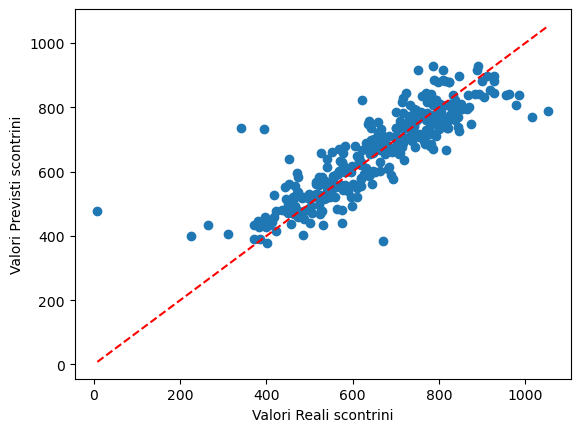

In [47]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

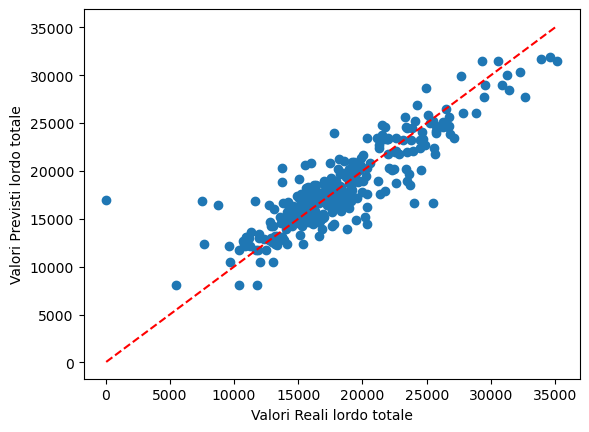

In [48]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.7484161647809262


In [50]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.7750402949653298


In [51]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR4_nr = model_SR4.predict(prediction_set)
predicted_LTR4_nr = model_LTR4.predict(prediction_set)

In [52]:
nullrows_set['S_R4'] = predicted_SR4_nr
nullrows_set['LT_R4'] = predicted_LTR4_nr

In [53]:
# Unisci i dataframe utilizzando l'indice comune
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R4_x,LT_R4_x,Anno_x,Mese_x,day_of_week,data_y,S_R4_y,LT_R4_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
821,2020-04-01,0.0,4.13,2020,4,Wednesday,2020-04-01,398.683025,8064.626884,2020,4,0,0,0,0,0,0,1
851,2020-05-01,0.0,4.13,2020,5,Friday,2020-05-01,404.126058,10878.877392,2020,5,1,0,0,0,0,0,0
1322,2021-08-15,602.0,0.00,2021,8,Sunday,2021-08-15,483.994893,16765.142455,2021,8,0,0,0,1,0,0,0


In [54]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R4_x']
        lt_new = common_index_rows.loc[idx, 'LT_R4_y']
        lt_corrente = row['LT_R4']
        s_old = common_index_rows.loc[idx, 'S_R4_x']
        s_new = common_index_rows.loc[idx, 'S_R4_y']
        s_corrente = row['S_R4']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R4'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R4'] = lt_new
        if s_old != 0:
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R4'] = s_old
            else:
                nullrows_set.at[idx, 'S_R4'] = s_new

# Mostra il test_set con le modifiche
nullrows_set

,data,S_R4,LT_R4,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
358,2018-12-25,827.182253,18341.816105,2018,12,0,0,0,0,0,1,0
359,2018-12-26,835.888619,18271.922088,2018,12,0,0,0,0,0,0,1
365,2019-01-01,734.502646,14659.348438,2019,1,0,0,0,0,0,1,0
475,2019-04-21,651.441346,16130.742892,2019,4,0,0,0,1,0,0,0
476,2019-04-22,806.506504,15674.800534,2019,4,0,1,0,0,0,0,0
591,2019-08-15,695.299482,15236.467808,2019,8,0,0,0,0,1,0,0
723,2019-12-25,775.228575,17934.308498,2019,12,0,0,0,0,0,0,1
724,2019-12-26,793.400986,17296.753753,2019,12,0,0,0,0,1,0,0
730,2020-01-01,755.150561,17221.107136,2020,1,0,0,0,0,0,0,1
821,2020-04-01,398.683025,8064.626884,2020,4,0,0,0,0,0,0,1


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [55]:
final_data_R4 = pd.concat([train_set, test_set, nullrows_set])

final_data_R4['day_of_week'] = final_data_R4[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R4 = final_data_R4.drop(['S_R4_predicted', 'LT_R4_predicted', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R4['day_of_week'] = final_data_R4['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R4 = final_data_R4.sort_values(by='data')

final_data_R4

,data,S_R4,LT_R4,Anno,Mese,day_of_week
243,2018-09-01,815.0,17001.8058,2018,9,Saturday
244,2018-09-02,614.0,14807.9085,2018,9,Sunday
245,2018-09-03,732.0,15593.5584,2018,9,Monday
246,2018-09-04,763.0,15651.2545,2018,9,Tuesday
247,2018-09-05,750.0,15640.6404,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,883.0,29297.2701,2023,4,Saturday
1945,2023-04-30,631.0,23554.8768,2023,4,Sunday
1946,2023-05-01,631.0,25218.6060,2023,5,Monday
1947,2023-05-02,765.0,23630.4971,2023,5,Tuesday


In [56]:
df_R4_new=final_data_R4
df_R4_new

,data,S_R4,LT_R4,Anno,Mese,day_of_week
243,2018-09-01,815.0,17001.8058,2018,9,Saturday
244,2018-09-02,614.0,14807.9085,2018,9,Sunday
245,2018-09-03,732.0,15593.5584,2018,9,Monday
246,2018-09-04,763.0,15651.2545,2018,9,Tuesday
247,2018-09-05,750.0,15640.6404,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,883.0,29297.2701,2023,4,Saturday
1945,2023-04-30,631.0,23554.8768,2023,4,Sunday
1946,2023-05-01,631.0,25218.6060,2023,5,Monday
1947,2023-05-02,765.0,23630.4971,2023,5,Tuesday


In [57]:
rows_with_zero = final_data_R4[(final_data_R4 == 0).any(axis=1)]

print(rows_with_zero)

Empty DataFrame
Columns: [data, S_R4, LT_R4, Anno, Mese, day_of_week]
Index: []


In [58]:
count_rows = len(final_data_R4[(final_data_R4['S_R4'] == 0) | (final_data_R4['LT_R4'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R5' and 'LT_R5' 

Restaurant 5 dataframe

In [119]:
df_R5_new

,data,S_R5,LT_R5,Anno,Mese,day_of_week
243,2018-09-01,1158.0,46703.5681,2018,9,Saturday
244,2018-09-02,974.0,37350.8527,2018,9,Sunday
245,2018-09-03,808.0,27135.5042,2018,9,Monday
246,2018-09-04,731.0,25410.8575,2018,9,Tuesday
247,2018-09-05,760.0,25916.1630,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1138.0,60227.3770,2023,4,Saturday
1945,2023-04-30,926.0,50888.7449,2023,4,Sunday
1946,2023-05-01,1006.0,54156.3183,2023,5,Monday
1947,2023-05-02,692.0,32186.6594,2023,5,Tuesday


In [120]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R5_new[(df_R5_new['S_R5'] != 0) & (df_R5_new['LT_R5'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week
880,2020-05-30,590.0,31968.3476,2020,5,Saturday
306,2018-11-03,1051.0,41308.3839,2018,11,Saturday
1481,2022-01-21,739.0,38820.9675,2022,1,Friday
1940,2023-04-25,868.0,49896.5537,2023,4,Tuesday
1765,2022-11-01,797.0,42602.6020,2022,11,Tuesday
...,...,...,...,...,...,...
1429,2021-11-30,546.0,26566.6793,2021,11,Tuesday
1593,2022-05-13,982.0,44909.8265,2022,5,Friday
1158,2021-03-04,499.0,22528.9848,2021,3,Thursday
1758,2022-10-25,701.0,30574.8856,2022,10,Tuesday


In [121]:
count_rows = len(train_set[(train_set['S_R5'] == 0) & (train_set['LT_R5'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


In [122]:
nullrows_set = df_R5_new[(df_R5_new['S_R5'] == 0) | (df_R5_new['LT_R5'] == 0) | (df_R5_new['S_R5'] == 0) & (df_R5_new['LT_R5'] == 0)]
nullrows_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
851,2020-05-01,0.0,0.0000,2020,5,Friday
852,2020-05-02,0.0,0.0000,2020,5,Saturday
853,2020-05-03,0.0,0.0000,2020,5,Sunday
1034,2020-10-31,0.0,36420.7354,2020,10,Saturday
1089,2020-12-25,0.0,0.0000,2020,12,Friday
1189,2021-04-04,0.0,0.0000,2021,4,Sunday
1792,2022-11-28,0.0,28720.8460,2022,11,Monday


In [123]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R5'] == 0) ^ (nullrows_set['LT_R5'] == 0)]
old_nullrows_variables

,data,S_R5,LT_R5,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
1034,2020-10-31,0.0,36420.7354,2020,10,Saturday
1792,2022-11-28,0.0,28720.8460,2022,11,Monday


In [124]:
count_rows = len(nullrows_set[(nullrows_set['S_R5'] == 0) | (nullrows_set['LT_R5'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 8


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [125]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [126]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Monday'] = nullrows_set['day_of_week_Monday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)


train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R5                            float64
LT_R5                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

In [127]:
train_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
880,2020-05-30,590.0,31968.3476,2020,5,0,0,1,0,0,0,0
306,2018-11-03,1051.0,41308.3839,2018,11,0,0,1,0,0,0,0
1481,2022-01-21,739.0,38820.9675,2022,1,1,0,0,0,0,0,0
1940,2023-04-25,868.0,49896.5537,2023,4,0,0,0,0,0,1,0
1765,2022-11-01,797.0,42602.6020,2022,11,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2021-11-30,546.0,26566.6793,2021,11,0,0,0,0,0,1,0
1593,2022-05-13,982.0,44909.8265,2022,5,1,0,0,0,0,0,0
1158,2021-03-04,499.0,22528.9848,2021,3,0,0,0,0,1,0,0
1758,2022-10-25,701.0,30574.8856,2022,10,0,0,0,0,0,1,0


In [128]:
test_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
978,2020-09-05,809.0,38461.9466,2020,9,0,0,1,0,0,0,0
1618,2022-06-07,838.0,34037.9319,2022,6,0,0,0,0,0,1,0
872,2020-05-22,480.0,25315.9501,2020,5,1,0,0,0,0,0,0
1937,2023-04-22,1223.0,67686.3222,2023,4,0,0,1,0,0,0,0
574,2019-07-29,876.0,27660.6337,2019,7,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2021-01-19,369.0,19920.4355,2021,1,0,0,0,0,0,1,0
1891,2023-03-07,694.0,30679.1268,2023,3,0,0,0,0,0,1,0
549,2019-07-04,882.0,30446.8969,2019,7,0,0,0,0,1,0,0
435,2019-03-12,663.0,22457.8662,2019,3,0,0,0,0,0,1,0


In [129]:
nullrows_set['day_of_week_Thursday'] = 0
nullrows_set['day_of_week_Tuesday'] = 0
nullrows_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday
821,2020-04-01,0.0,4.1300,2020,4,0,0,0,0,1,0,0
851,2020-05-01,0.0,0.0000,2020,5,1,0,0,0,0,0,0
852,2020-05-02,0.0,0.0000,2020,5,0,0,1,0,0,0,0
853,2020-05-03,0.0,0.0000,2020,5,0,0,0,1,0,0,0
1034,2020-10-31,0.0,36420.7354,2020,10,0,0,1,0,0,0,0
1089,2020-12-25,0.0,0.0000,2020,12,1,0,0,0,0,0,0
1189,2021-04-04,0.0,0.0000,2021,4,0,0,0,1,0,0,0
1792,2022-11-28,0.0,28720.8460,2022,11,0,1,0,0,0,0,0


In [130]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR5 = train_set['S_R5']
y_train_LTR5 = train_set['LT_R5']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

In [132]:
from sklearn.model_selection import GridSearchCV
model_SR5 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR5 = GridSearchCV(model_SR5, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR5.fit(X_train, y_train_SR5)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR5 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR5 = GridSearchCV(model_LTR5, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR5.fit(X_train, y_train_LTR5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [133]:
predicted_SR5 = model_SR5.predict(X_test)
predicted_LTR5 = model_LTR5.predict(X_test)

In [134]:
test_set['S_R5_predicted'] = predicted_SR5
test_set['LT_R5_predicted'] = predicted_LTR5
test_set

,data,S_R5,LT_R5,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R5_predicted,LT_R5_predicted
978,2020-09-05,809.0,38461.9466,2020,9,0,0,1,0,0,0,0,888.655471,41171.946802
1618,2022-06-07,838.0,34037.9319,2022,6,0,0,0,0,0,1,0,751.045708,33281.799263
872,2020-05-22,480.0,25315.9501,2020,5,1,0,0,0,0,0,0,343.182522,25289.806853
1937,2023-04-22,1223.0,67686.3222,2023,4,0,0,1,0,0,0,0,1098.185862,59941.491839
574,2019-07-29,876.0,27660.6337,2019,7,0,1,0,0,0,0,0,783.469421,24863.676934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2021-01-19,369.0,19920.4355,2021,1,0,0,0,0,0,1,0,394.938950,20870.941802
1891,2023-03-07,694.0,30679.1268,2023,3,0,0,0,0,0,1,0,718.255105,35467.085035
549,2019-07-04,882.0,30446.8969,2019,7,0,0,0,0,1,0,0,870.270772,29033.253488
435,2019-03-12,663.0,22457.8662,2019,3,0,0,0,0,0,1,0,732.090741,21028.360511


In [135]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R5']
y_true_lt = test_set['LT_R5']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R5_predicted']
y_pred_lt = test_set['LT_R5_predicted']

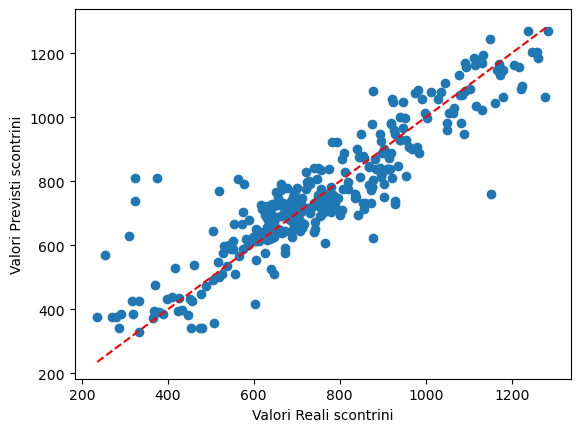

In [136]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

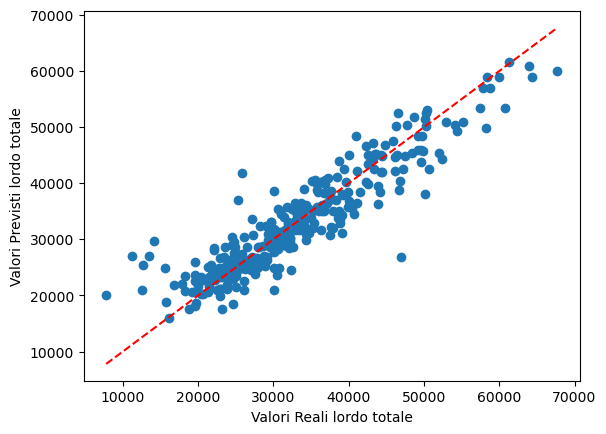

In [137]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [138]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.822226085398163


In [139]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.847499152813376


In [140]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR5_nr = model_SR5.predict(prediction_set)
predicted_LTR5_nr = model_LTR5.predict(prediction_set)

In [141]:
nullrows_set['S_R5'] = predicted_SR5_nr
nullrows_set['LT_R5'] = predicted_LTR5_nr

In [142]:
# Unisci i dataframe utilizzando l'indice comune
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R5_x,LT_R5_x,Anno_x,Mese_x,day_of_week,data_y,S_R5_y,LT_R5_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday
821,2020-04-01,0.0,4.1300,2020,4,Wednesday,2020-04-01,545.953231,21848.913276,2020,4,0,0,0,0,1,0,0
1034,2020-10-31,0.0,36420.7354,2020,10,Saturday,2020-10-31,867.441934,40386.294042,2020,10,0,0,1,0,0,0,0
1792,2022-11-28,0.0,28720.8460,2022,11,Monday,2022-11-28,694.136381,30961.673384,2022,11,0,1,0,0,0,0,0


In [143]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R5_x']
        lt_new = common_index_rows.loc[idx, 'LT_R5_y']
        lt_corrente = row['LT_R5']
        s_old = common_index_rows.loc[idx, 'S_R5_x']
        s_new = common_index_rows.loc[idx, 'S_R5_y']
        s_corrente = row['S_R5']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R5'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R5'] = lt_new
        if s_old !=0 :
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R5'] = s_old
            else:
                nullrows_set.at[idx, 'S_R5'] = s_new

# Mostra il test_set con le modifiche
nullrows_set


,data,S_R5,LT_R5,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday
821,2020-04-01,545.953231,21848.913276,2020,4,0,0,0,0,1,0,0
851,2020-05-01,343.182522,25289.806853,2020,5,1,0,0,0,0,0,0
852,2020-05-02,460.875798,29086.845763,2020,5,0,0,1,0,0,0,0
853,2020-05-03,318.535750,22692.105401,2020,5,0,0,0,1,0,0,0
1034,2020-10-31,867.441934,36420.735400,2020,10,0,0,1,0,0,0,0
1089,2020-12-25,462.287897,25277.187358,2020,12,1,0,0,0,0,0,0
1189,2021-04-04,501.776776,25218.863140,2021,4,0,0,0,1,0,0,0
1792,2022-11-28,694.136381,28720.846000,2022,11,0,1,0,0,0,0,0


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [144]:
final_data_R5 = pd.concat([train_set, test_set, nullrows_set])

final_data_R5['day_of_week'] = final_data_R5[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R5 = final_data_R5.drop(['S_R5_predicted', 'LT_R5_predicted', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R5['day_of_week'] = final_data_R5['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R5 = final_data_R5.sort_values(by='data')

final_data_R5

,data,S_R5,LT_R5,Anno,Mese,day_of_week
243,2018-09-01,1158.0,46703.5681,2018,9,Saturday
244,2018-09-02,974.0,37350.8527,2018,9,Sunday
245,2018-09-03,808.0,27135.5042,2018,9,Monday
246,2018-09-04,731.0,25410.8575,2018,9,Tuesday
247,2018-09-05,760.0,25916.1630,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1138.0,60227.3770,2023,4,Saturday
1945,2023-04-30,926.0,50888.7449,2023,4,Sunday
1946,2023-05-01,1006.0,54156.3183,2023,5,Monday
1947,2023-05-02,692.0,32186.6594,2023,5,Tuesday


In [145]:
df_R5_new=final_data_R5
df_R5_new

,data,S_R5,LT_R5,Anno,Mese,day_of_week
243,2018-09-01,1158.0,46703.5681,2018,9,Saturday
244,2018-09-02,974.0,37350.8527,2018,9,Sunday
245,2018-09-03,808.0,27135.5042,2018,9,Monday
246,2018-09-04,731.0,25410.8575,2018,9,Tuesday
247,2018-09-05,760.0,25916.1630,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1138.0,60227.3770,2023,4,Saturday
1945,2023-04-30,926.0,50888.7449,2023,4,Sunday
1946,2023-05-01,1006.0,54156.3183,2023,5,Monday
1947,2023-05-02,692.0,32186.6594,2023,5,Tuesday


In [146]:
count_rows = len(final_data_R5[(final_data_R5['S_R5'] == 0) | (final_data_R5['LT_R5'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


## Replace the missing values using a Random Forest Regressor model to predict the values of 'S_R6' and 'LT_R6'

### Restaurant 6 dataframe

In [147]:
df_R6_new

,data,S_R6,LT_R6,Anno,Mese,day_of_week
243,2018-09-01,774.0,27423.1587,2018,9,Saturday
244,2018-09-02,664.0,22980.6829,2018,9,Sunday
245,2018-09-03,706.0,23780.8704,2018,9,Monday
246,2018-09-04,644.0,20020.7119,2018,9,Tuesday
247,2018-09-05,691.0,22211.6769,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1075.0,50024.3359,2023,4,Saturday
1945,2023-04-30,969.0,44285.2466,2023,4,Sunday
1946,2023-05-01,912.0,44482.7432,2023,5,Monday
1947,2023-05-02,847.0,32306.8424,2023,5,Tuesday


In [148]:
from sklearn.model_selection import train_test_split

# Definisci il tuo dataset
dataset = df_R6_new[(df_R6_new['S_R6'] != 0) & (df_R6_new['LT_R6'] != 0)]

# Specifica la frazione da mantenere nel test set (0.2 per il 20%)
test_size = 0.2

# Esegui la suddivisione tra train e test set
train_set, test_set = train_test_split(dataset, test_size=test_size, random_state=42)
train_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week
549,2019-07-04,749.0,19585.9055,2019,7,Thursday
435,2019-03-12,751.0,24152.2813,2019,3,Tuesday
552,2019-07-07,650.0,20850.3463,2019,7,Sunday
881,2020-05-31,442.0,22725.4489,2020,5,Sunday
306,2018-11-03,754.0,25201.1774,2018,11,Saturday
...,...,...,...,...,...,...
1428,2021-11-29,702.0,27009.8283,2021,11,Monday
1592,2022-05-12,817.0,34158.0323,2022,5,Thursday
1157,2021-03-03,489.0,21089.5146,2021,3,Wednesday
1757,2022-10-24,807.0,31971.6516,2022,10,Monday


In [149]:
count_rows = len(train_set[(train_set['S_R6'] == 0) & (train_set['LT_R6'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


In [150]:
nullrows_set = df_R6_new[(df_R6_new['S_R6'] == 0) | (df_R6_new['LT_R6'] == 0) | (df_R6_new['S_R6'] == 0) & (df_R6_new['LT_R6'] == 0)]
nullrows_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
851,2020-05-01,0.0,0.0000,2020,5,Friday
852,2020-05-02,0.0,0.0000,2020,5,Saturday
853,2020-05-03,0.0,0.0000,2020,5,Sunday
1089,2020-12-25,0.0,0.0000,2020,12,Friday
1189,2021-04-04,0.0,0.0000,2021,4,Sunday
1815,2022-12-21,0.0,49765.3849,2022,12,Wednesday


In [151]:
old_nullrows_variables = nullrows_set[(nullrows_set['S_R6'] == 0) ^ (nullrows_set['LT_R6'] == 0)]
old_nullrows_variables

,data,S_R6,LT_R6,Anno,Mese,day_of_week
821,2020-04-01,0.0,4.1300,2020,4,Wednesday
1815,2022-12-21,0.0,49765.3849,2022,12,Wednesday


In [152]:
count_rows = len(test_set[(test_set['S_R6'] == 0) | (test_set['LT_R6'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


### Preprocessing of train and test set

- Convert the days of the week into dummy variables (in order to be readable by the Random Forest Regressor model)
- Change the type of 'Anno', 'Mese', 'day_of_week' in numbers (integers)
- Check the type of the variables in the train_set

In [153]:
train_set = pd.get_dummies(train_set, columns=['day_of_week'])
test_set = pd.get_dummies(test_set, columns=['day_of_week'])
nullrows_set = pd.get_dummies(nullrows_set, columns=['day_of_week'])

In [154]:
test_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
725,2019-12-27,822.0,26679.4696,2019,12,True,False,False,False,False,False,False
308,2018-11-05,536.0,15820.7497,2018,11,False,True,False,False,False,False,False
1224,2021-05-09,619.0,28355.3410,2021,5,False,False,False,True,False,False,False
724,2019-12-26,656.0,21514.3264,2019,12,False,False,False,False,True,False,False
266,2018-09-24,639.0,16841.5618,2018,9,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
391,2019-01-27,615.0,21052.6750,2019,1,False,False,False,True,False,False,False
658,2019-10-21,564.0,17087.5033,2019,10,False,True,False,False,False,False,False
1571,2022-04-21,695.0,28613.3008,2022,4,False,False,False,False,True,False,False
878,2020-05-28,352.0,19432.2282,2020,5,False,False,False,False,True,False,False


In [155]:
train_set['day_of_week_Friday'] = train_set['day_of_week_Friday'].astype(int)
train_set['day_of_week_Monday'] = train_set['day_of_week_Monday'].astype(int)
train_set['day_of_week_Saturday'] = train_set['day_of_week_Saturday'].astype(int)
train_set['day_of_week_Sunday'] = train_set['day_of_week_Sunday'].astype(int)
train_set['day_of_week_Thursday'] = train_set['day_of_week_Thursday'].astype(int)
train_set['day_of_week_Tuesday'] = train_set['day_of_week_Tuesday'].astype(int)
train_set['day_of_week_Wednesday'] = train_set['day_of_week_Wednesday'].astype(int)

test_set['day_of_week_Friday'] = test_set['day_of_week_Friday'].astype(int)
test_set['day_of_week_Monday'] = test_set['day_of_week_Monday'].astype(int)
test_set['day_of_week_Saturday'] = test_set['day_of_week_Saturday'].astype(int)
test_set['day_of_week_Sunday'] = test_set['day_of_week_Sunday'].astype(int)
test_set['day_of_week_Tuesday'] = test_set['day_of_week_Tuesday'].astype(int)
test_set['day_of_week_Wednesday'] = test_set['day_of_week_Wednesday'].astype(int)
test_set['day_of_week_Thursday'] = test_set['day_of_week_Thursday'].astype(int)

nullrows_set['day_of_week_Friday'] = nullrows_set['day_of_week_Friday'].astype(int)
nullrows_set['day_of_week_Saturday'] = nullrows_set['day_of_week_Saturday'].astype(int)
nullrows_set['day_of_week_Sunday'] = nullrows_set['day_of_week_Sunday'].astype(int)
nullrows_set['day_of_week_Wednesday'] = nullrows_set['day_of_week_Wednesday'].astype(int)


train_set['Anno'] = train_set['Anno'].astype(int)
train_set['Mese'] = train_set['Mese'].astype(int)

test_set['Anno'] = test_set['Anno'].astype(int)
test_set['Mese'] = test_set['Mese'].astype(int)

nullrows_set['Anno'] = nullrows_set['Anno'].astype(int)
nullrows_set['Mese'] = nullrows_set['Mese'].astype(int)

train_set.dtypes

data                     datetime64[ns]
S_R6                            float64
LT_R6                           float64
Anno                              int32
Mese                              int32
day_of_week_Friday                int32
day_of_week_Monday                int32
day_of_week_Saturday              int32
day_of_week_Sunday                int32
day_of_week_Thursday              int32
day_of_week_Tuesday               int32
day_of_week_Wednesday             int32
dtype: object

In [156]:
train_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
549,2019-07-04,749.0,19585.9055,2019,7,0,0,0,0,1,0,0
435,2019-03-12,751.0,24152.2813,2019,3,0,0,0,0,0,1,0
552,2019-07-07,650.0,20850.3463,2019,7,0,0,0,1,0,0,0
881,2020-05-31,442.0,22725.4489,2020,5,0,0,0,1,0,0,0
306,2018-11-03,754.0,25201.1774,2018,11,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2021-11-29,702.0,27009.8283,2021,11,0,1,0,0,0,0,0
1592,2022-05-12,817.0,34158.0323,2022,5,0,0,0,0,1,0,0
1157,2021-03-03,489.0,21089.5146,2021,3,0,0,0,0,0,0,1
1757,2022-10-24,807.0,31971.6516,2022,10,0,1,0,0,0,0,0


In [157]:
test_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
725,2019-12-27,822.0,26679.4696,2019,12,1,0,0,0,0,0,0
308,2018-11-05,536.0,15820.7497,2018,11,0,1,0,0,0,0,0
1224,2021-05-09,619.0,28355.3410,2021,5,0,0,0,1,0,0,0
724,2019-12-26,656.0,21514.3264,2019,12,0,0,0,0,1,0,0
266,2018-09-24,639.0,16841.5618,2018,9,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
391,2019-01-27,615.0,21052.6750,2019,1,0,0,0,1,0,0,0
658,2019-10-21,564.0,17087.5033,2019,10,0,1,0,0,0,0,0
1571,2022-04-21,695.0,28613.3008,2022,4,0,0,0,0,1,0,0
878,2020-05-28,352.0,19432.2282,2020,5,0,0,0,0,1,0,0


In [158]:
nullrows_set['day_of_week_Thursday'] = 0
nullrows_set['day_of_week_Tuesday'] = 0
nullrows_set['day_of_week_Monday'] = 0
nullrows_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Monday
821,2020-04-01,0.0,4.1300,2020,4,0,0,0,1,0,0,0
851,2020-05-01,0.0,0.0000,2020,5,1,0,0,0,0,0,0
852,2020-05-02,0.0,0.0000,2020,5,0,1,0,0,0,0,0
853,2020-05-03,0.0,0.0000,2020,5,0,0,1,0,0,0,0
1089,2020-12-25,0.0,0.0000,2020,12,1,0,0,0,0,0,0
1189,2021-04-04,0.0,0.0000,2021,4,0,0,1,0,0,0,0
1815,2022-12-21,0.0,49765.3849,2022,12,0,0,0,1,0,0,0


In [159]:
X_train = train_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]
y_train_SR6 = train_set['S_R6']
y_train_LTR6 = train_set['LT_R6']
X_test = test_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

In [161]:
from sklearn.model_selection import GridSearchCV
model_SR6 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Testa diversi valori per il numero di alberi
    'max_depth': [None, 10, 20],  # Testa diverse profondità massime per gli alberi
    'min_samples_split': [2, 5, 10],  # Testa diversi valori per il numero minimo di campioni per la suddivisione
    'min_samples_leaf': [1, 2, 4]  # Testa diversi valori per il numero minimo di campioni in una foglia
}

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_SR6 = GridSearchCV(model_SR6, param_grid, cv=5, scoring='neg_mean_squared_error')

# Addestra il modello con il set di dati
model_SR6.fit(X_train, y_train_SR6)
#model_LTR1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_LTR6 = RandomForestRegressor(random_state=42)

# Crea un oggetto GridSearchCV per eseguire la ricerca dei parametri migliori
model_LTR6 = GridSearchCV(model_LTR6, param_grid, cv=5, scoring='neg_mean_squared_error')

#model_SR1.fit(X_train, y_train_SR1)
model_LTR6.fit(X_train, y_train_LTR6)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [162]:
predicted_SR6 = model_SR6.predict(X_test)
predicted_LTR6 = model_LTR6.predict(X_test)

In [163]:
test_set['S_R6_predicted'] = predicted_SR6
test_set['LT_R6_predicted'] = predicted_LTR6
test_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,S_R6_predicted,LT_R6_predicted
725,2019-12-27,822.0,26679.4696,2019,12,1,0,0,0,0,0,0,1088.607851,36989.762197
308,2018-11-05,536.0,15820.7497,2018,11,0,1,0,0,0,0,0,545.759658,15902.244753
1224,2021-05-09,619.0,28355.3410,2021,5,0,0,0,1,0,0,0,659.400688,30021.408418
724,2019-12-26,656.0,21514.3264,2019,12,0,0,0,0,1,0,0,841.315115,25390.571362
266,2018-09-24,639.0,16841.5618,2018,9,0,1,0,0,0,0,0,638.054047,22969.708663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2019-01-27,615.0,21052.6750,2019,1,0,0,0,1,0,0,0,688.610449,25615.025268
658,2019-10-21,564.0,17087.5033,2019,10,0,1,0,0,0,0,0,725.841407,20007.563487
1571,2022-04-21,695.0,28613.3008,2022,4,0,0,0,0,1,0,0,765.392366,33495.052128
878,2020-05-28,352.0,19432.2282,2020,5,0,0,0,0,1,0,0,302.760188,21655.886592


In [164]:
# Estrarre le etichette reali (y_true) dalla colonna 'y_true' del test set
y_true_s = test_set['S_R6']
y_true_lt = test_set['LT_R6']
# Estrarre le etichette previste (y_pred) dal risultato del tuo modello (ad esempio, dalla colonna 'y_pred')
y_pred_s = test_set['S_R6_predicted']
y_pred_lt = test_set['LT_R6_predicted']

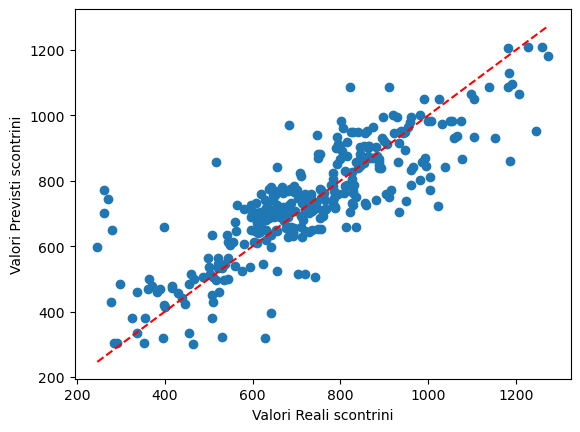

In [165]:
# Creare lo scatter plot
plt.scatter(y_true_s, y_pred_s)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali scontrini')
plt.ylabel('Valori Previsti scontrini')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_s), max(y_true_s)], [min(y_true_s), max(y_true_s)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

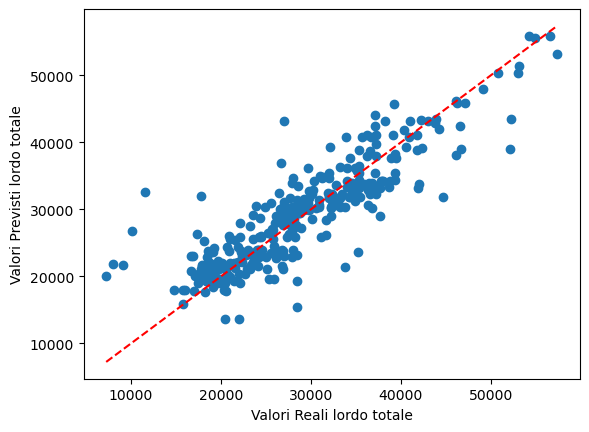

In [166]:
# Creare lo scatter plot
plt.scatter(y_true_lt, y_pred_lt)

# Aggiungere etichette agli assi
plt.xlabel('Valori Reali lordo totale')
plt.ylabel('Valori Previsti lordo totale')

# Aggiungere una linea diagonale per il riferimento (valori perfettamente predetti)
plt.plot([min(y_true_lt), max(y_true_lt)], [min(y_true_lt), max(y_true_lt)], color='red', linestyle='--')

# Mostrare il plot
plt.show()

In [167]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true_s, y_pred_s)
print(f'R-squared: {r2}')

R-squared: 0.6923732429711204


In [168]:
r2 = r2_score(y_true_lt, y_pred_lt)
print(f'R-squared: {r2}')

R-squared: 0.7749748405141688


In [169]:
prediction_set= nullrows_set[['Anno', 'Mese', 'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']]

predicted_SR6_nr = model_SR6.predict(prediction_set)
predicted_LTR6_nr = model_LTR6.predict(prediction_set)

In [170]:
nullrows_set['S_R6'] = predicted_SR6_nr
nullrows_set['LT_R6'] = predicted_LTR6_nr

In [171]:
# Unisci i dataframe utilizzando l'indice comune
common_index_rows = old_nullrows_variables.merge(nullrows_set, left_index=True, right_index=True, how='inner')

common_index_rows

,data_x,S_R6_x,LT_R6_x,Anno_x,Mese_x,day_of_week,data_y,S_R6_y,LT_R6_y,Anno_y,Mese_y,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Monday
821,2020-04-01,0.0,4.1300,2020,4,Wednesday,2020-04-01,634.139088,18253.468700,2020,4,0,0,0,1,0,0,0
1815,2022-12-21,0.0,49765.3849,2022,12,Wednesday,2022-12-21,933.507025,38122.421694,2022,12,0,0,0,1,0,0,0


In [172]:
# Definisci una funzione per confrontare l'ordine di grandezza
def stesso_ordine_grandezza(a, b, tolleranza=0.1):
    return abs(a - b) / max(abs(a), abs(b)) <= tolleranza

# Itera attraverso le righe del test_set
for idx, row in nullrows_set.iterrows():
    if idx in common_index_rows.index:
        lt_old = common_index_rows.loc[idx, 'LT_R6_x']
        lt_new = common_index_rows.loc[idx, 'LT_R6_y']
        lt_corrente = row['LT_R6']
        s_old = common_index_rows.loc[idx, 'S_R6_x']
        s_new = common_index_rows.loc[idx, 'S_R6_y']
        s_corrente = row['S_R6']

        # Confronta i valori per l'ordine di grandezza
        if lt_old != 0:
            if stesso_ordine_grandezza(lt_corrente, lt_old) or not lt_old:
                nullrows_set.at[idx, 'LT_R6'] = lt_old
            else:
                nullrows_set.at[idx, 'LT_R6'] = lt_new
        if s_old !=0 :
            if stesso_ordine_grandezza(s_corrente, s_old) or not s_old:
                nullrows_set.at[idx, 'S_R6'] = s_old
            else:
                nullrows_set.at[idx, 'S_R6'] = s_new

# Mostra il test_set con le modifiche
nullrows_set

,data,S_R6,LT_R6,Anno,Mese,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Monday
821,2020-04-01,634.139088,18253.468700,2020,4,0,0,0,1,0,0,0
851,2020-05-01,299.368020,22984.187053,2020,5,1,0,0,0,0,0,0
852,2020-05-02,333.523107,23035.049324,2020,5,0,1,0,0,0,0,0
853,2020-05-03,337.565919,21034.864298,2020,5,0,0,1,0,0,0,0
1089,2020-12-25,485.910356,31968.867250,2020,12,1,0,0,0,0,0,0
1189,2021-04-04,554.407114,26556.868906,2021,4,0,0,1,0,0,0,0
1815,2022-12-21,933.507025,38122.421694,2022,12,0,0,0,1,0,0,0


### Combine the training and test sets to come back to the initial dataframe
- Concatenate train and test set to come back to the original dataframe
- Reconvert the dummy variables in days of the week
- Reassign the right name of the days of the week
- Sort the rows by 'data'

In [173]:
final_data_R6 = pd.concat([train_set, test_set, nullrows_set])

final_data_R6['day_of_week'] = final_data_R6[['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday']].idxmax(axis=1)
final_data_R6 = final_data_R6.drop(['S_R6_predicted', 'LT_R6_predicted', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday'], axis=1)
final_data_R6['day_of_week'] = final_data_R6['day_of_week'].replace({
    'day_of_week_Monday': 'Monday',
    'day_of_week_Thursday': 'Thursday',
    'day_of_week_Friday': 'Friday',
    'day_of_week_Saturday': 'Saturday',
    'day_of_week_Sunday': 'Sunday',
    'day_of_week_Tuesday': 'Tuesday',
    'day_of_week_Wednesday': 'Wednesday'
})
# Riordina il DataFrame in base alla colonna 'data'
final_data_R6 = final_data_R6.sort_values(by='data')

final_data_R6

,data,S_R6,LT_R6,Anno,Mese,day_of_week
243,2018-09-01,774.0,27423.1587,2018,9,Saturday
244,2018-09-02,664.0,22980.6829,2018,9,Sunday
245,2018-09-03,706.0,23780.8704,2018,9,Monday
246,2018-09-04,644.0,20020.7119,2018,9,Tuesday
247,2018-09-05,691.0,22211.6769,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1075.0,50024.3359,2023,4,Saturday
1945,2023-04-30,969.0,44285.2466,2023,4,Sunday
1946,2023-05-01,912.0,44482.7432,2023,5,Monday
1947,2023-05-02,847.0,32306.8424,2023,5,Tuesday


In [174]:
df_R6_new=final_data_R6
df_R6_new

,data,S_R6,LT_R6,Anno,Mese,day_of_week
243,2018-09-01,774.0,27423.1587,2018,9,Saturday
244,2018-09-02,664.0,22980.6829,2018,9,Sunday
245,2018-09-03,706.0,23780.8704,2018,9,Monday
246,2018-09-04,644.0,20020.7119,2018,9,Tuesday
247,2018-09-05,691.0,22211.6769,2018,9,Wednesday
...,...,...,...,...,...,...
1944,2023-04-29,1075.0,50024.3359,2023,4,Saturday
1945,2023-04-30,969.0,44285.2466,2023,4,Sunday
1946,2023-05-01,912.0,44482.7432,2023,5,Monday
1947,2023-05-02,847.0,32306.8424,2023,5,Tuesday


In [175]:
count_rows = len(final_data_R6[(final_data_R6['S_R6'] == 0) | (final_data_R6['LT_R6'] == 0)])
print("Numero di righe che soddisfano la condizione:", count_rows)

Numero di righe che soddisfano la condizione: 0


**boxplot**

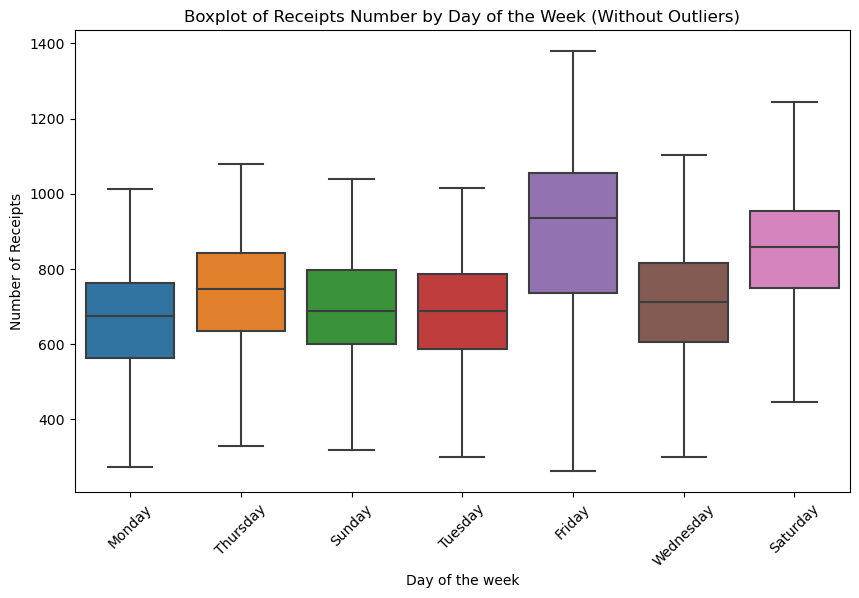

In [135]:
import seaborn as sns
# Crea un boxplot per il numero di scontrini emessi in ogni giorno della settimana senza outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='S_R6', data=df_R6_new, showfliers=False)
plt.title('Boxplot of Receipts Number by Day of the Week (Without Outliers)')
plt.xlabel('Day of the week')
plt.ylabel('Number of Receipts')
plt.xticks(rotation=45)
plt.show()

### creazione file csv

In [206]:
# Supponendo che df_R1_new, df_R2_new, df_R3_new, df_R4_new, df_R5_new, df_R6_new siano i tuoi DataFrame

# Definisci una lista di coppie DataFrame e nomi dei file CSV
dataframes = [
    (df_R1_new, "R1"),
    (df_R2_new, "R2"),
    (df_R3_new, "R3"),
    (df_R4_new, "R4"),
    (df_R5_new, "R5"),
    (df_R6_new, "R6")
]

# Itera attraverso la lista e salva ciascun DataFrame in un file CSV
for df, file_name in dataframes:
    df.to_csv(f"{file_name}.csv", index=False)